<a href="https://colab.research.google.com/github/joshipj22/Assesment_Series_Case_Study_boosting/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [680]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [681]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [682]:
import pandas as pd
from sklearn.impute import SimpleImputer as Imputer
from random import choices
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import BaseEstimator

In [683]:
from google.colab import files
import zipfile
import os

# Ensure the zip file is uploaded if not already
# If you've already uploaded 'house-prices-advanced-regression-techniques.zip',
# you might not need to run files.upload() again, but it won't hurt.
# uploaded = files.upload()

# Define the path to your uploaded zip file
zip_file_path = '/content/house-prices-advanced-regression-techniques.zip' # This assumes it's in /content

# Create a directory to extract the contents into (optional, but good practice)
extraction_path = '/content/house_prices_data'
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Files unzipped to: {extraction_path}")

# List the contents of the extracted directory to see what's available
print("Contents of the extracted directory:")
for root, dirs, files in os.walk(extraction_path):
    for name in files:
        print(os.path.join(root, name))

Files unzipped to: /content/house_prices_data
Contents of the extracted directory:
/content/house_prices_data/train.csv
/content/house_prices_data/test.csv
/content/house_prices_data/sample_submission.csv
/content/house_prices_data/data_description.txt


In [684]:
ds = pd.read_csv("/content/house_prices_data/train.csv")
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [685]:
ds.shape

(1460, 81)

In [686]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Diagnostics



In [687]:
print(f"The no. of duplicate rows in the dataset are {int(ds.duplicated().any())}")

The no. of duplicate rows in the dataset are 0


####Checking for unique values in features

In [688]:
"""for col in ds.columns:
  if ds[col].dtype=="object":
    ds[col]=ds[col].str.lower()
  print(f'Unique Values in {col} are {ds[col].nunique()}')
  print(ds[col].unique())
  print('-'*70)
  print('-'*70)"""

'for col in ds.columns:\n  if ds[col].dtype=="object":\n    ds[col]=ds[col].str.lower()\n  print(f\'Unique Values in {col} are {ds[col].nunique()}\')\n  print(ds[col].unique())\n  print(\'-\'*70)\n  print(\'-\'*70)'

In [689]:
todrop = ['Id']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]

In [690]:
ds[categorical].describe()

,MSSubClass,MoSold
count,1460.000000,1460.000000
mean,56.897260,6.321918
std,42.300571,2.703626
min,20.000000,1.000000
25%,20.000000,5.000000
50%,50.000000,6.000000
75%,70.000000,8.000000
max,190.000000,12.000000


In [691]:
ds[continuous].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [692]:
ds[cat_to_con].describe()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC
count,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,770,1379,1379,1379,7
unique,4,5,4,4,4,6,6,5,4,7,5,3,5,5,3
top,TA,TA,TA,TA,No,Unf,Unf,Ex,TA,Typ,Gd,Unf,TA,TA,Gd
freq,906,1282,649,1311,953,430,1256,741,735,1360,380,605,1311,1326,3


<Axes: ylabel='Frequency'>

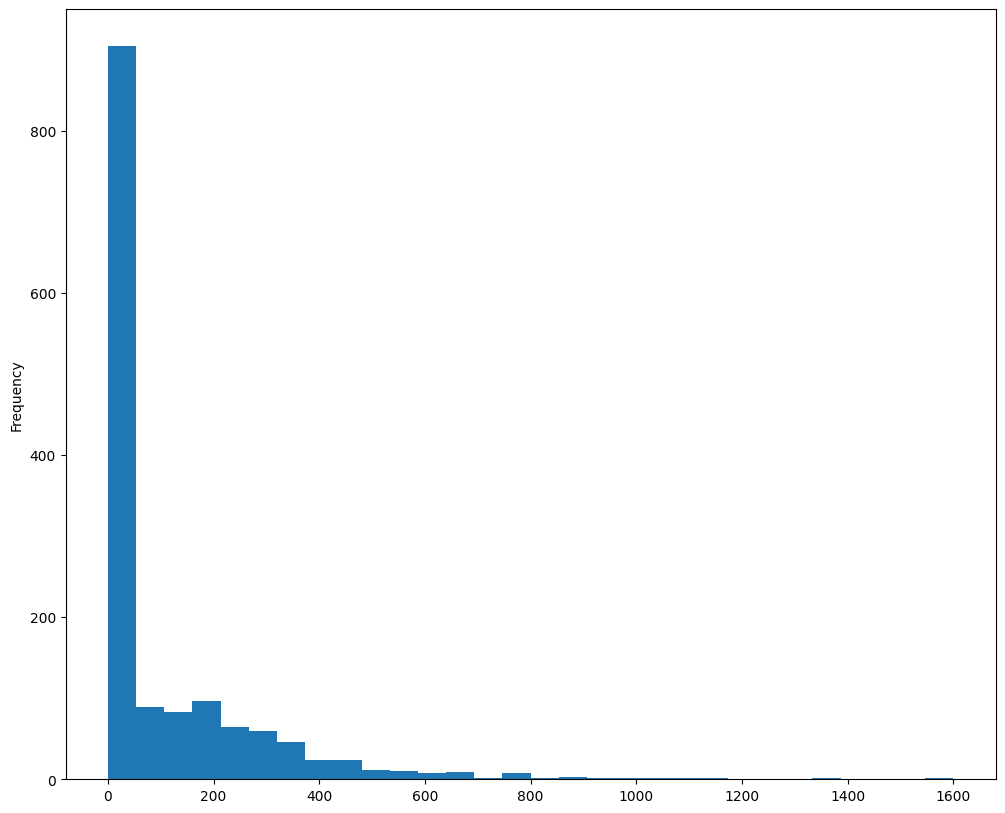

In [693]:
ds['MasVnrArea'].plot(kind='hist', bins=30)

In [694]:
nan_counts = ds.isna().sum()
print("Number of NaN values per column:")
print(nan_counts[nan_counts > 0])

Number of NaN values per column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [695]:
#ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].median())
#ds['MasVnrArea']  = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())
#ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())
#print(ds[continuous].isna().sum().sum())

In [696]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Example pipeline
imputer = KNNImputer()
scaler = StandardScaler()

pipe = Pipeline([
     ('scaler', scaler),
     ('imputer', imputer)
])

#fit and transform the data using pipeline
ds[['LotFrontage','MasVnrArea','GarageYrBlt']] = pipe.fit_transform(ds[['LotFrontage','MasVnrArea','GarageYrBlt']])
print(ds[['LotFrontage','MasVnrArea','GarageYrBlt']].isna().sum().sum())

0


In [697]:
def pre_processing(ds, todrop, categorical, cat_to_con):
  #dropping
  ds = ds.drop(columns=todrop)

  #categorical
  logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')
  ds['Electrical'] = ds['Electrical'].fillna(ds['Electrical'].value_counts().index[0])  # mode
  print("no. of nans in categorical cols:", ds[categorical].isna().sum().sum())


  #cat_to_con
  ds['FireplaceQu'] = ds['FireplaceQu'].fillna('NA')
  logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')

  ds.drop(columns = ['PoolQC'], inplace=True)
  cat_to_con.remove('PoolQC')
  print("no. of nans in cat_to_con cols:",ds[cat_to_con].isna().sum().sum())

  #target_encoding
  target = 'SalePrice'
  '''
  for col in categorical:
      ds[col] = ds.groupby([col])[target].transform('mean')'''
  target_maps={}
  for col in categorical:
    target_map = ds.groupby(col)[target].mean()
    target_maps[col] = target_map
    ds[col] = ds[col].map(target_map)
  print("no. of nans in categorical cols:", ds[categorical].isna().sum().sum())



  #label encoding
  grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
  for col in grp1:
      ds[col] = ds[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})

  for col in ['BsmtFinType1', 'BsmtFinType2']:
      ds[col] = ds[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

  ds['BsmtExposure'] = ds['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
  ds['Functional'] = ds['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
  ds['GarageFinish'] = ds['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

  print("total nans in the dataframe:", ds.isna().sum().sum())

  return ds,target_maps

In [698]:
ds, target_maps= pre_processing(ds, todrop, categorical, cat_to_con)

no. of nans in categorical cols: 0
no. of nans in cat_to_con cols: 0
no. of nans in categorical cols: 0
total nans in the dataframe: 0


In [699]:
ds.columns[ds.isna().sum()>0]

Index([], dtype='object')

## Univariate Analysis

####Univariate Analysis of Continuous Variables

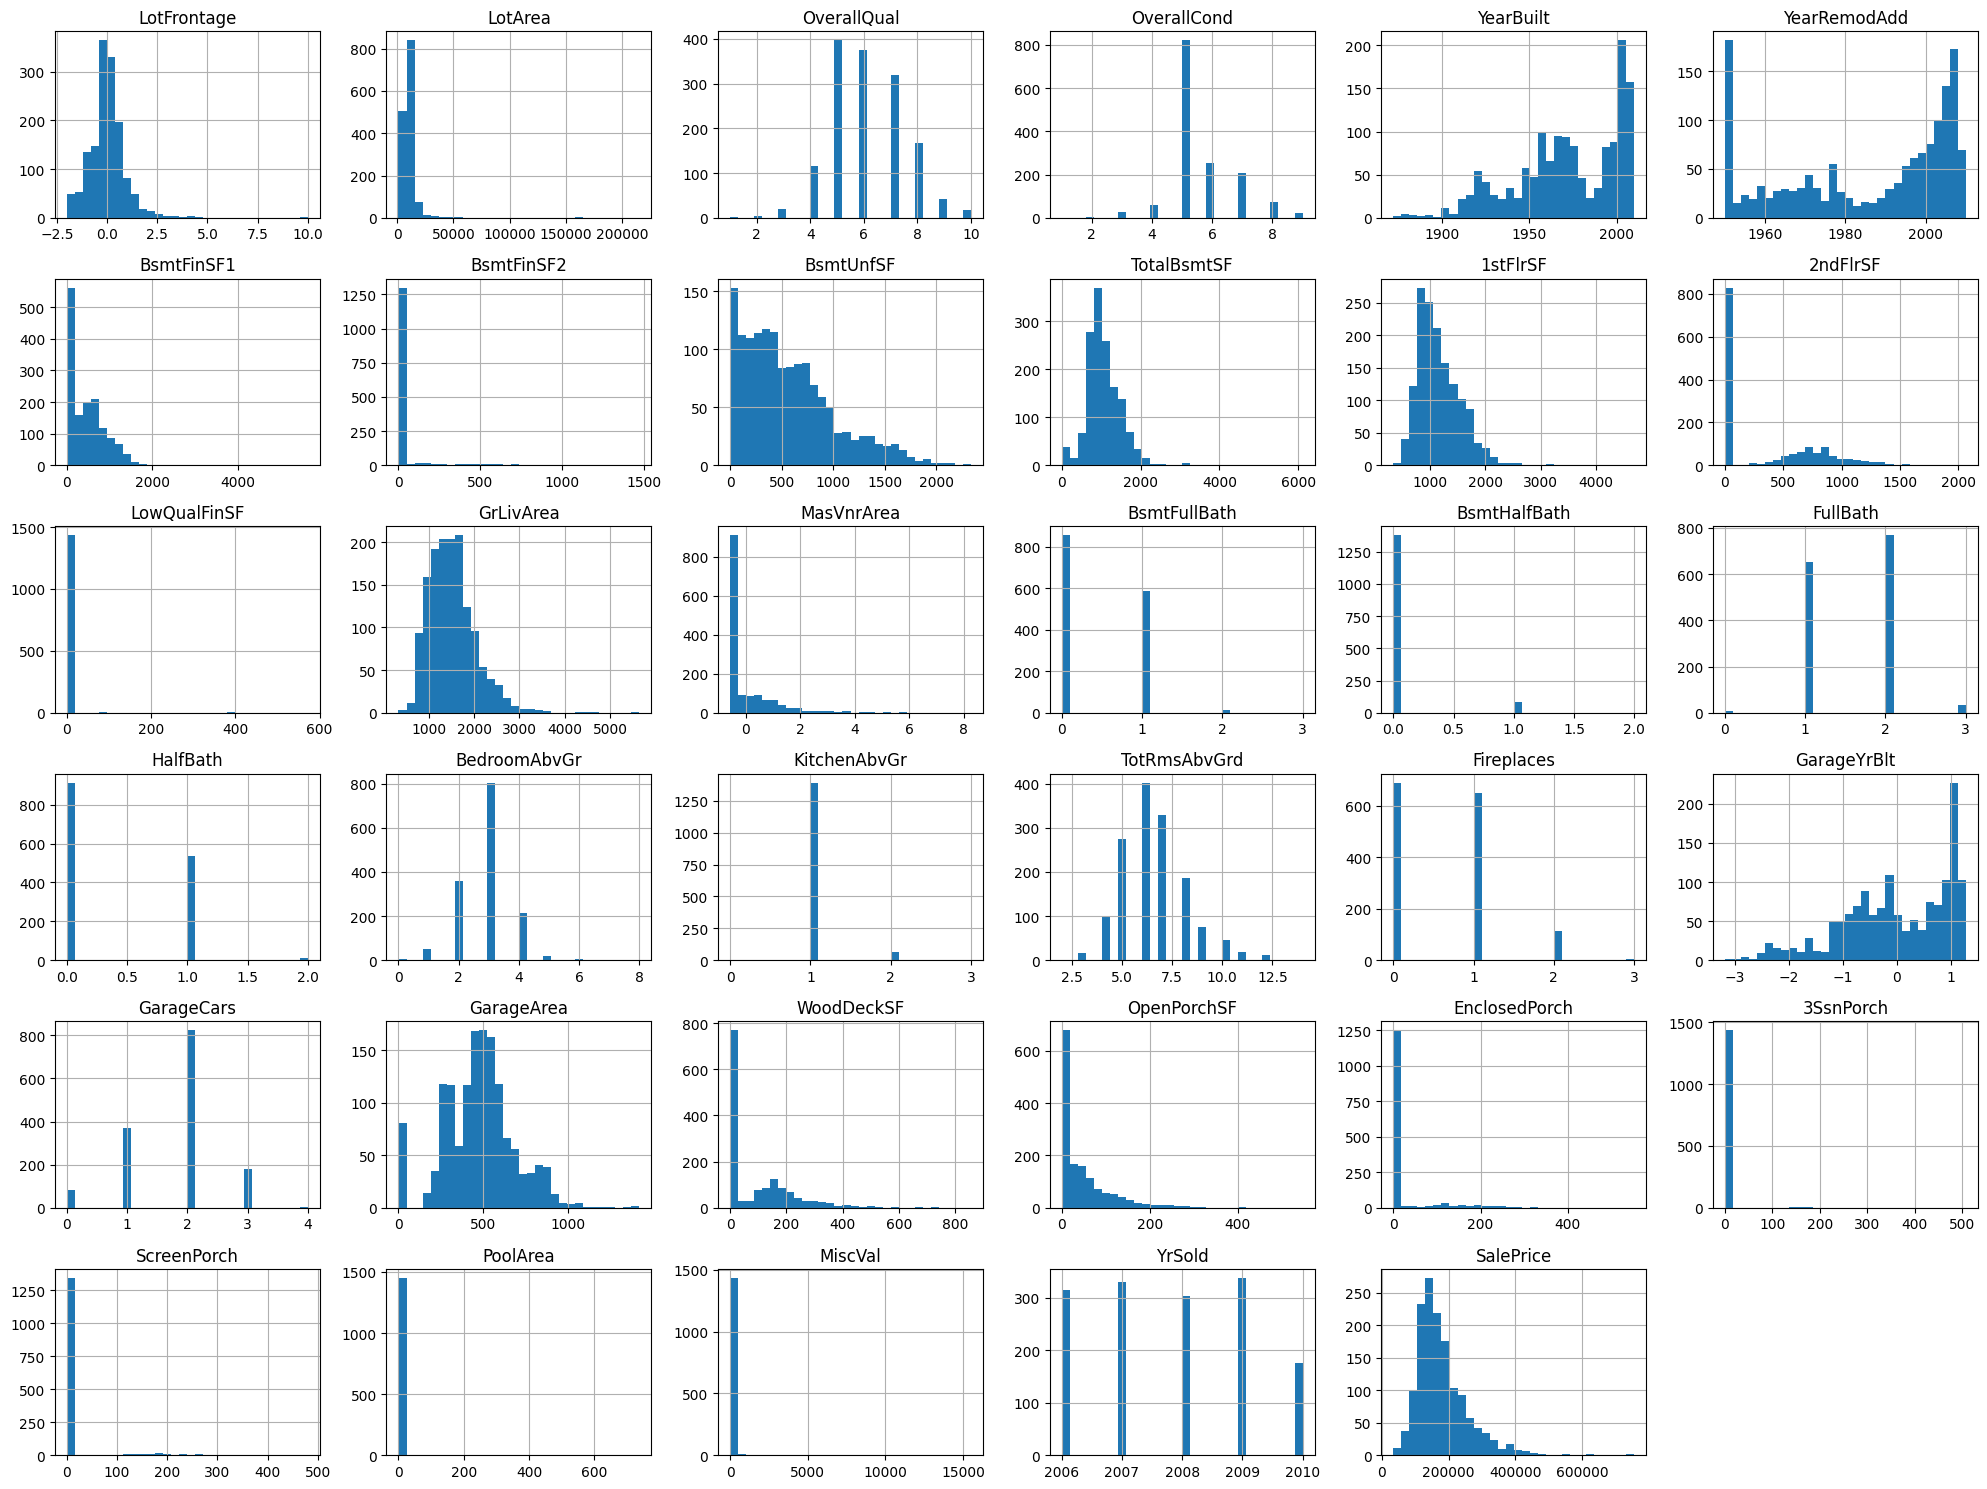

In [700]:
#Plotting histograms for Continuous Variables in a grid plot
ds[continuous].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

**Insights:**
* Features concerning area are right skewed.
* Sales price is right skewed
* Year built is left skewed

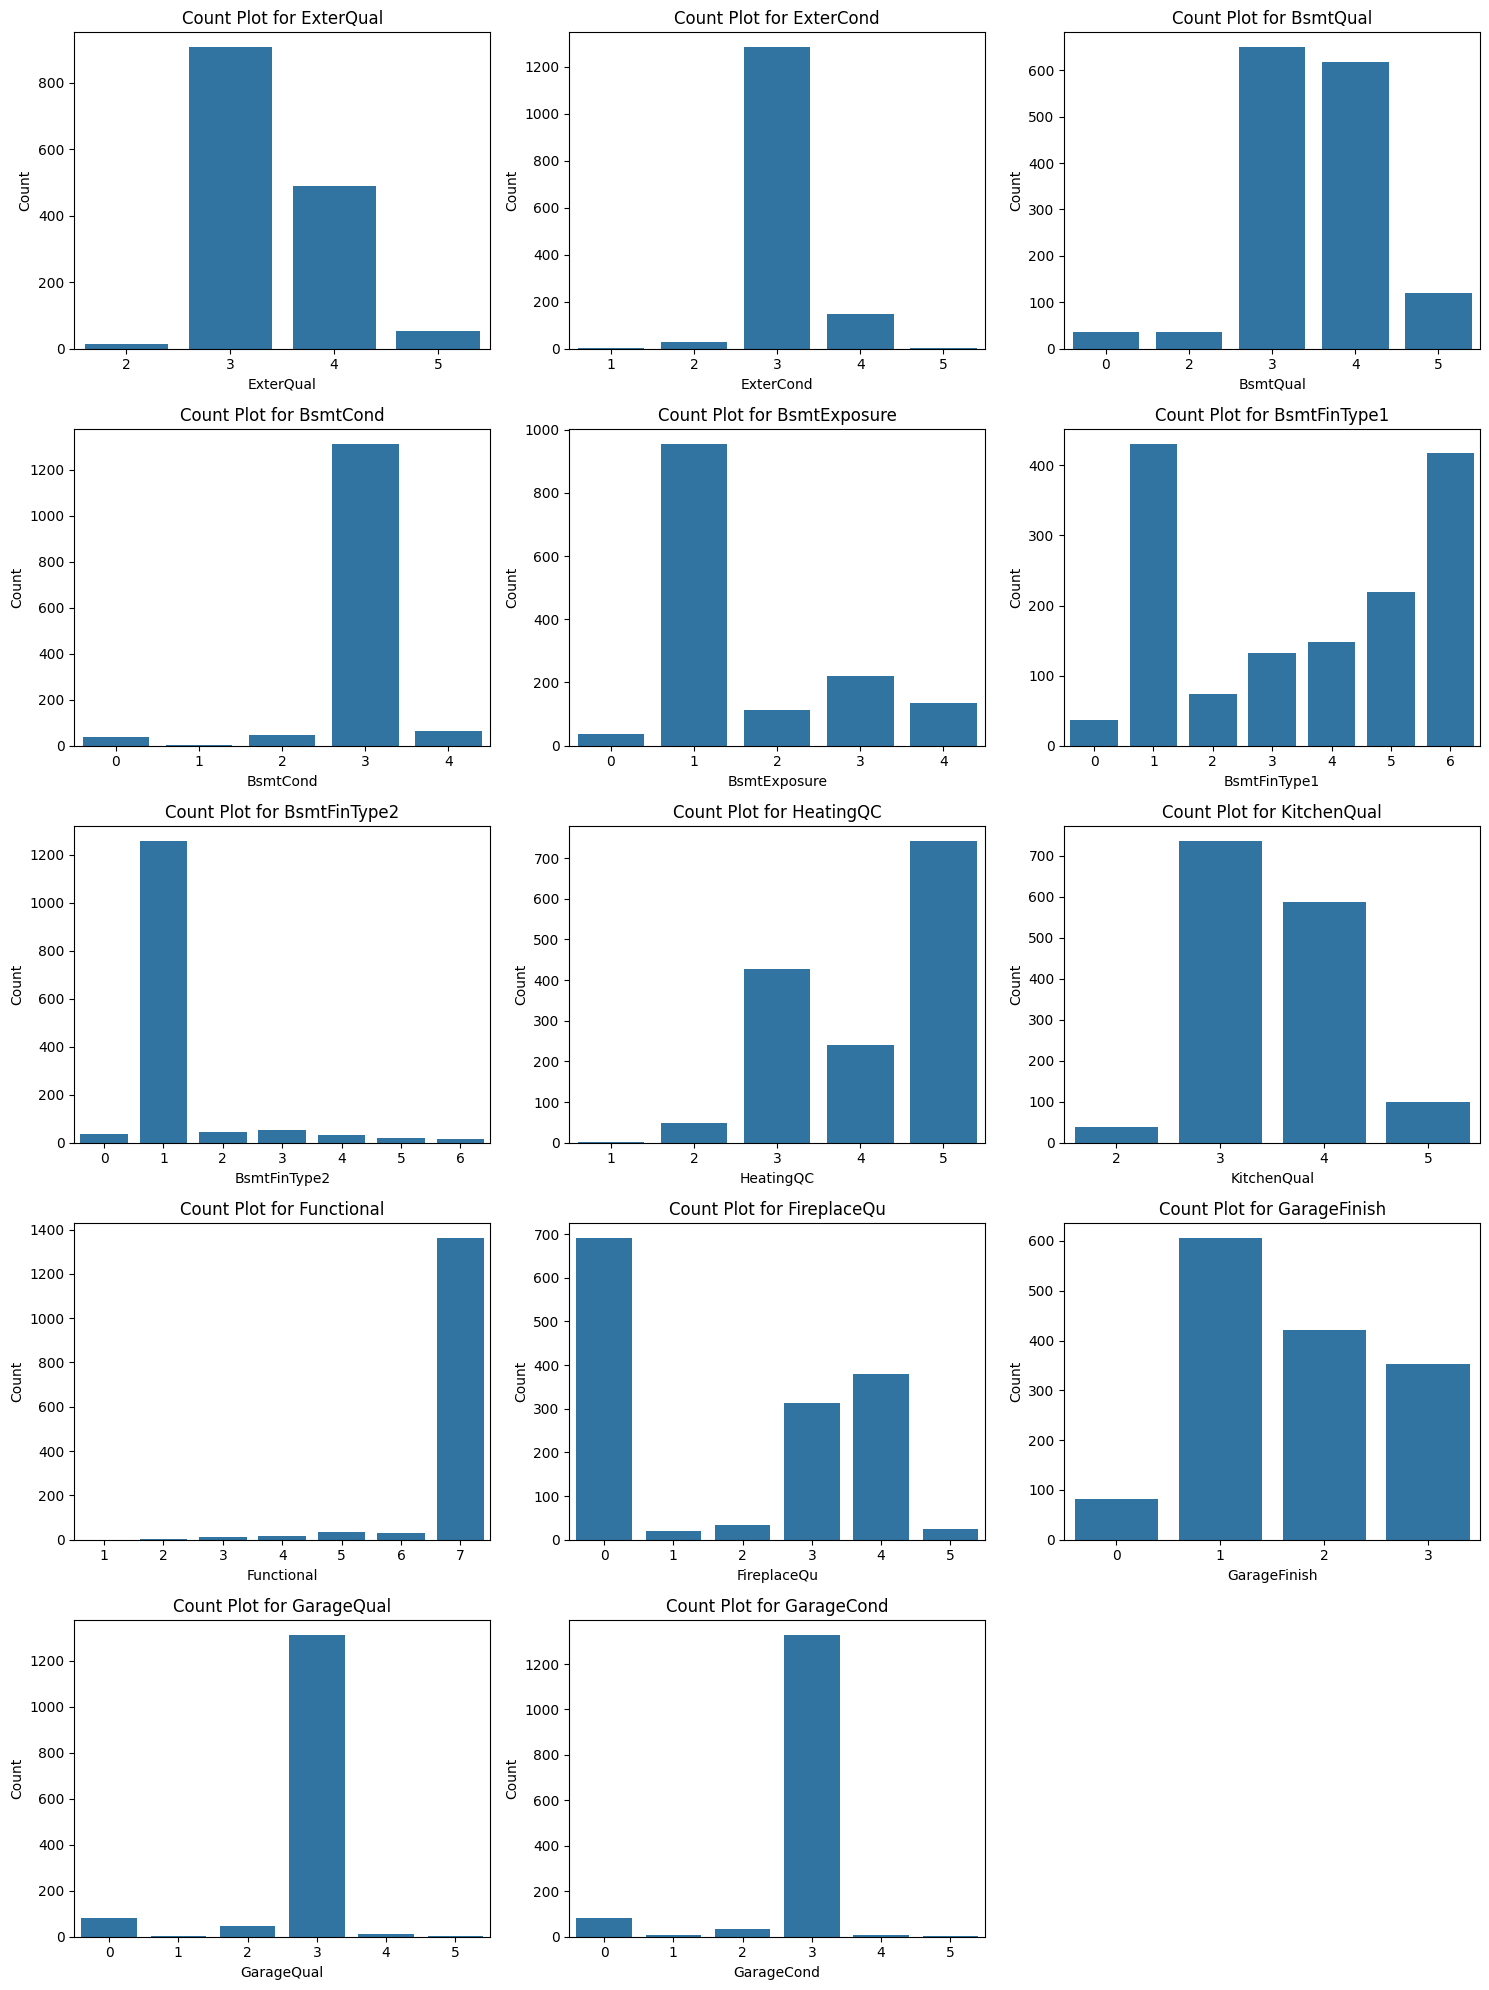


Note: The following columns were target-encoded and now represent continuous values (means).
A count plot is not suitable for them. Consider using histograms instead:
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


In [701]:
import seaborn as sns
import matplotlib.pyplot as plt

# The 'cat_to_con' list contains features that were label encoded.
# These can be treated as ordinal categorical features with numerical labels.
label_encoded_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                      'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                      'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']

# Filter out any columns that might not exist or were dropped.
existing_label_encoded_cols = [col for col in label_encoded_cols if col in ds.columns]

if existing_label_encoded_cols:
    num_plots = len(existing_label_encoded_cols)
    num_cols = 3  # Adjust as needed for better layout
    num_rows = (num_plots + num_cols - 1) // num_cols

    plt.figure(figsize=(num_cols * 5, num_rows * 4))
    for i, col in enumerate(existing_label_encoded_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(x=ds[col])
        plt.title(f'Count Plot for {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("No label-encoded categorical columns found in the dataset for count plotting.")

# For the columns that were target-encoded (originally in 'categorical' list),
# they now hold continuous numerical values (means).
# A count plot is not appropriate for these.
target_encoded_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                       'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                       'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'Fence',
                       'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

existing_target_encoded_cols = [col for col in target_encoded_cols if col in ds.columns]

if existing_target_encoded_cols:
    print("\nNote: The following columns were target-encoded and now represent continuous values (means).")
    print("A count plot is not suitable for them. Consider using histograms instead:")
    print(existing_target_encoded_cols)


In [702]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_i = StandardScaler()
ds_scaled = scaler_i.fit_transform(ds)

In [703]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))
print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))

25465.92038777065
0.0897091892371182


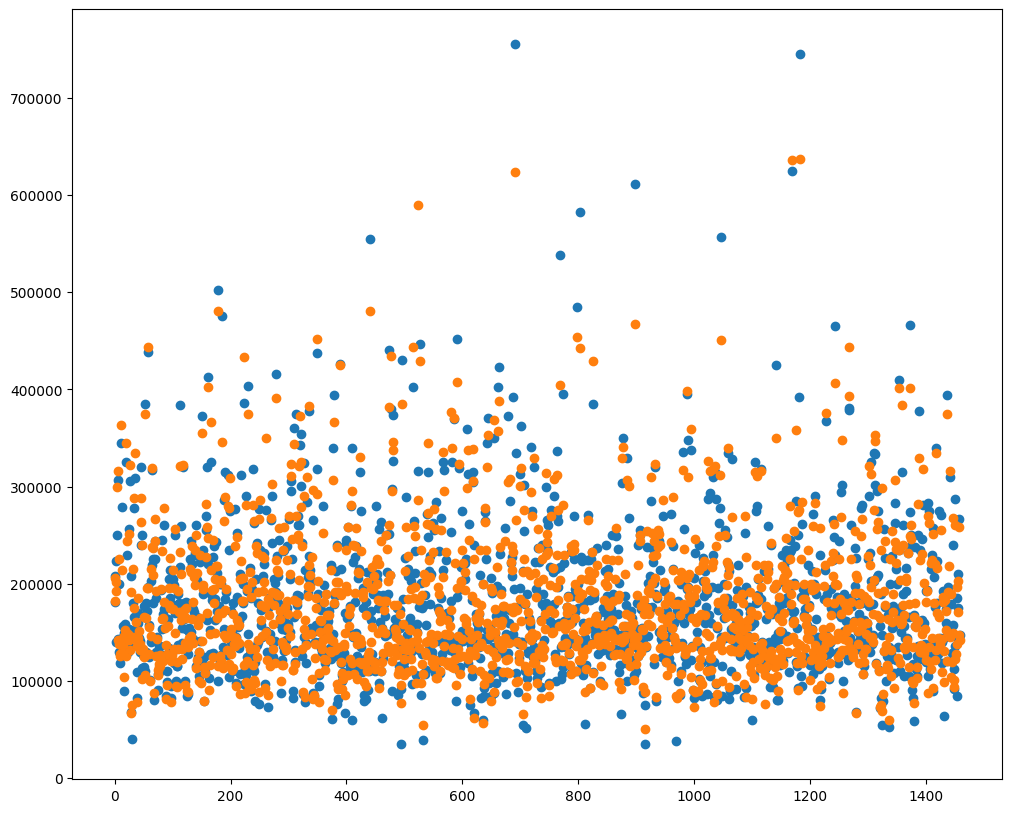

In [704]:
plt.scatter(range(len(y_true)), y_true)
plt.scatter(range(len(y_true)), y_pred)

**Insights:**

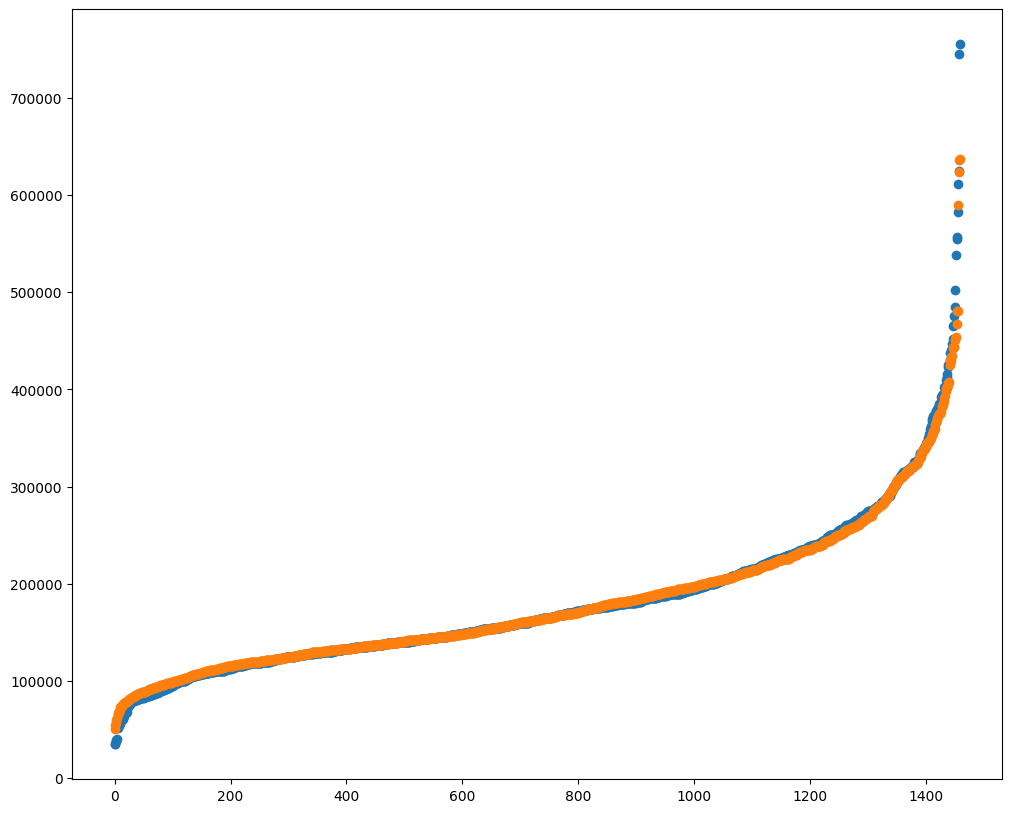

In [705]:
plt.scatter(range(len(y_true)), sorted(y_true))
plt.scatter(range(len(y_true)), sorted(y_pred))

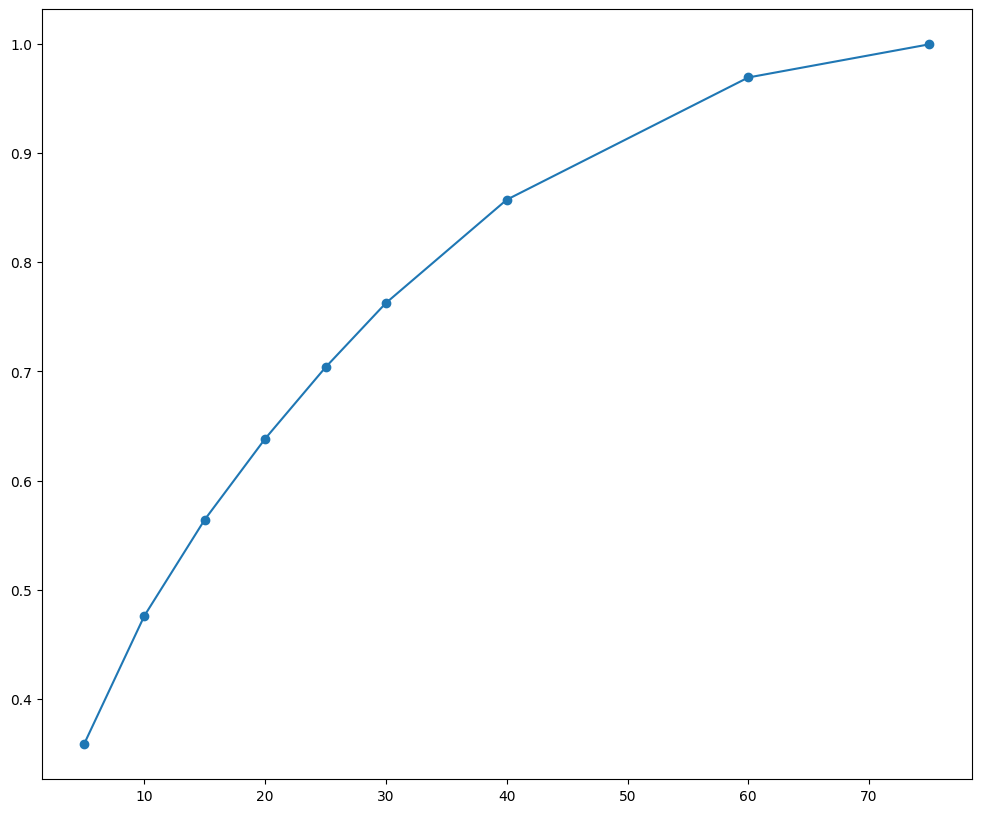

In [706]:
from sklearn.decomposition import PCA

cs = [5, 10, 15, 20, 25, 30, 40, 60, 75]
info = []
for i in cs:
  pca = PCA(n_components=i)
  pca.fit(ds_scaled[:, :-1])
  info.append(pca.explained_variance_ratio_.sum())

plt.plot(cs, info, '-o')

In [707]:
pca = PCA(n_components=40)
Xpca = pca.fit_transform(X)
y = ds['SalePrice']

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)

28317.089964598916


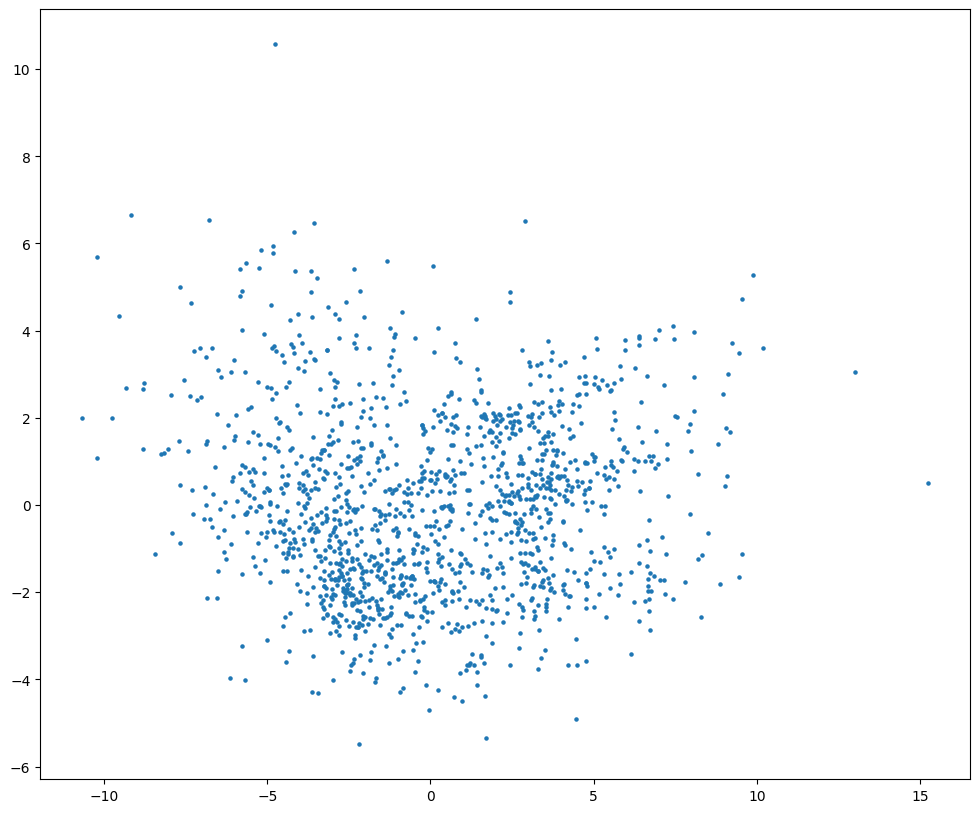

In [708]:
pca = PCA(n_components=2)
vis = pca.fit_transform(X)
plt.scatter(vis[:, 0], vis[:, 1], s = 5)

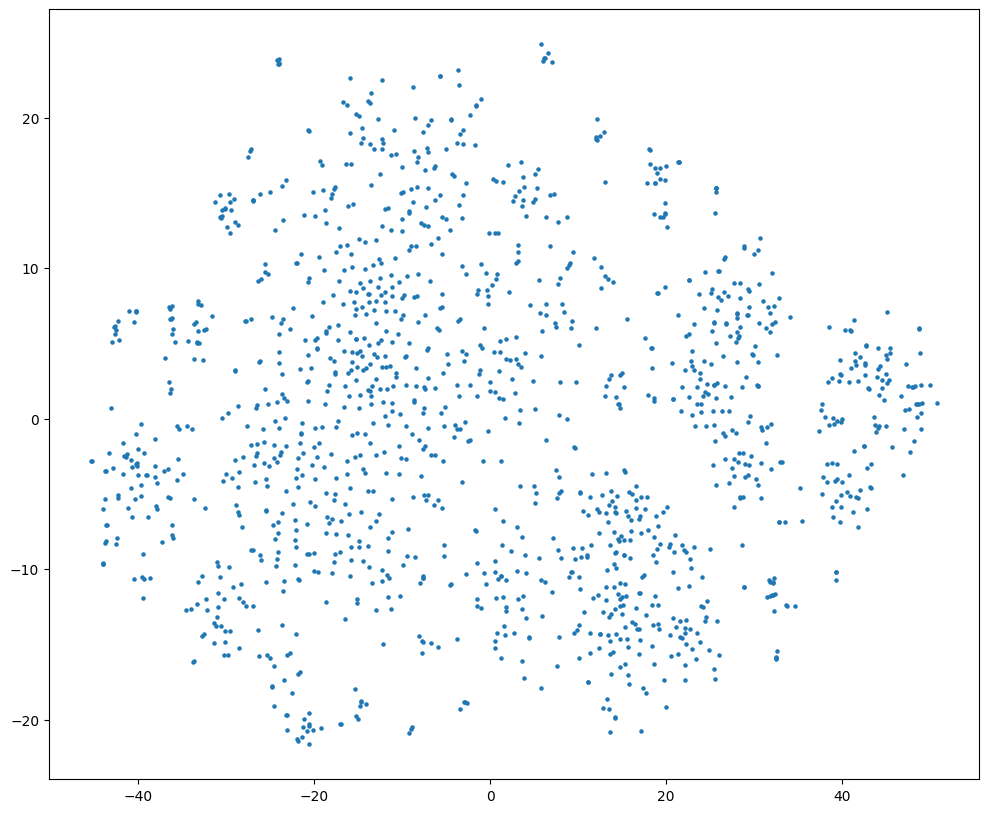

In [709]:
from sklearn.manifold import TSNE

pca = TSNE(n_components=2, perplexity=50, random_state=0)
vis = pca.fit_transform(X)
plt.scatter(vis[:,0], vis[:,1], s=5)

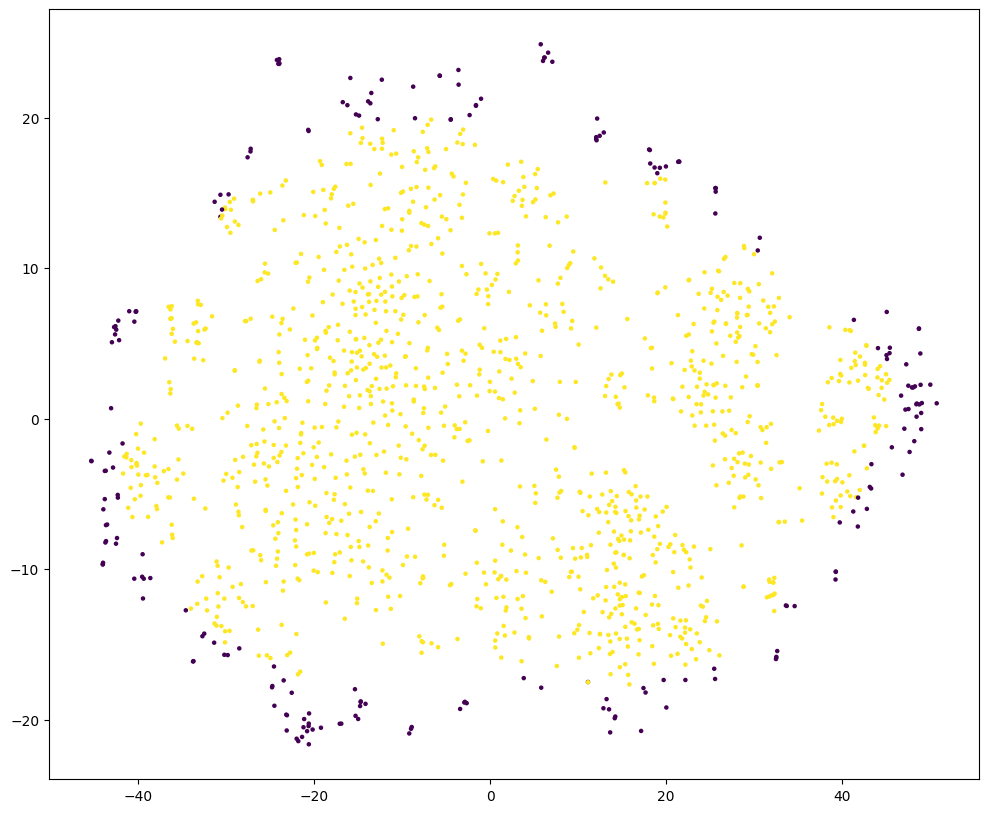

In [710]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

is_outlier = IsolationForest(contamination=0.15, random_state=0,
                            n_estimators=1000).fit_predict(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()

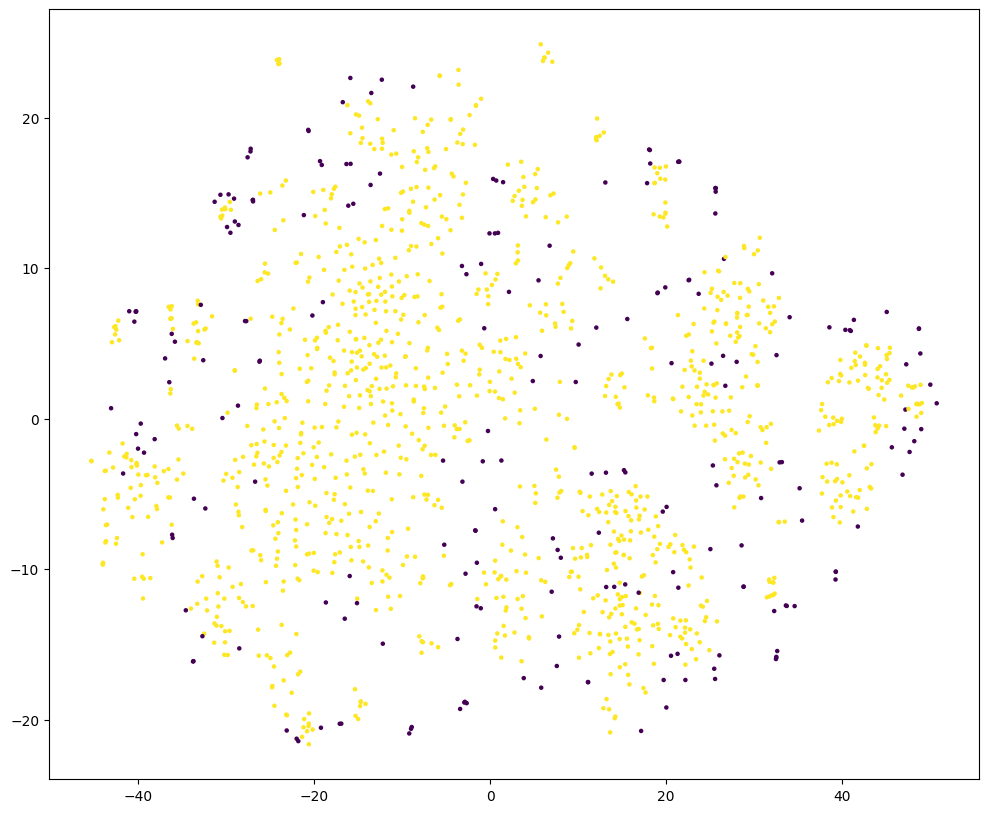

In [711]:
is_outlier = LocalOutlierFactor(contamination=0.15, n_neighbors=5).fit_predict(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-488245903.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, cmap='Spectral')


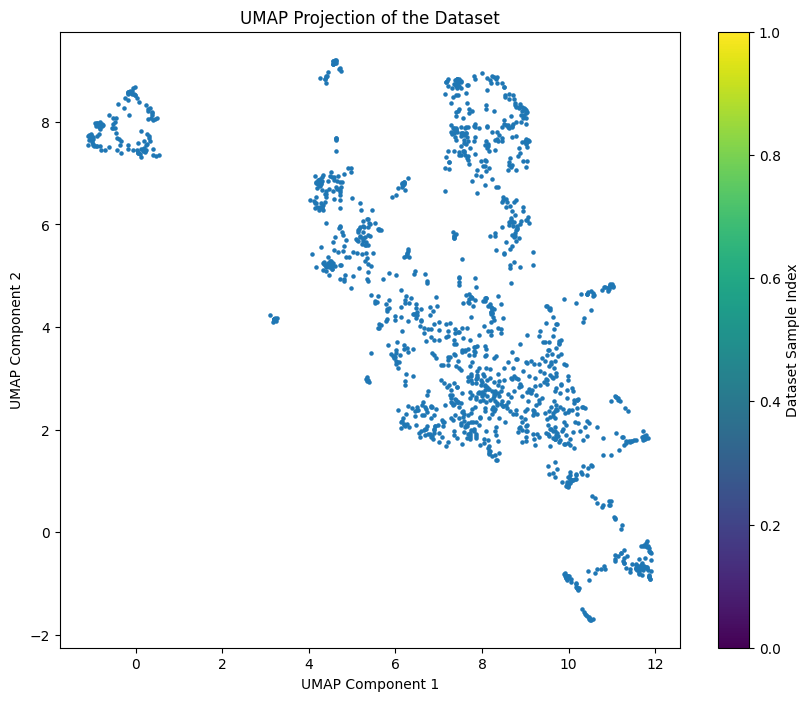

In [712]:
!pip install umap-learn

import umap
# import umap.plot # Removed this line as it was causing an ImportError for unused dependencies

umap_reducer = umap.UMAP(random_state=0)
# X is already defined as ds_scaled[:, :-1]
umap_embedding = umap_reducer.fit_transform(ds_scaled[:, :-1])

plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, cmap='Spectral')
plt.title('UMAP Projection of the Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Dataset Sample Index')
plt.show()

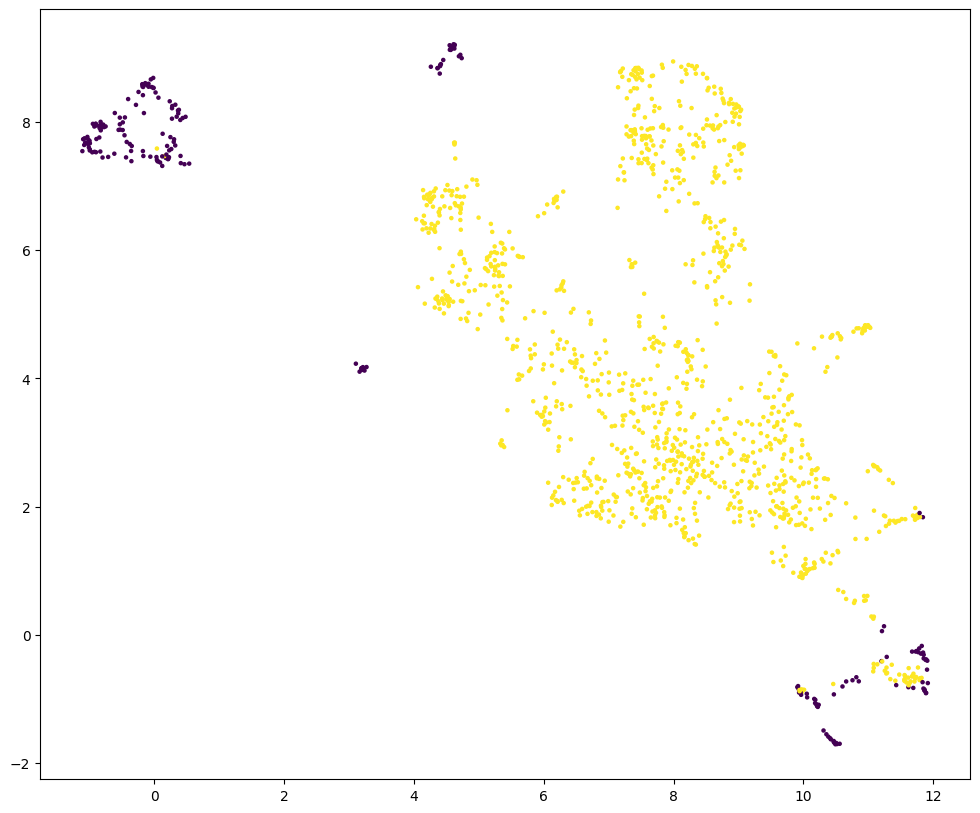

In [713]:
is_outlier = IsolationForest(contamination=0.15, random_state=0,
                            n_estimators=1000).fit_predict(umap_embedding)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, c=is_outlier)
plt.show()

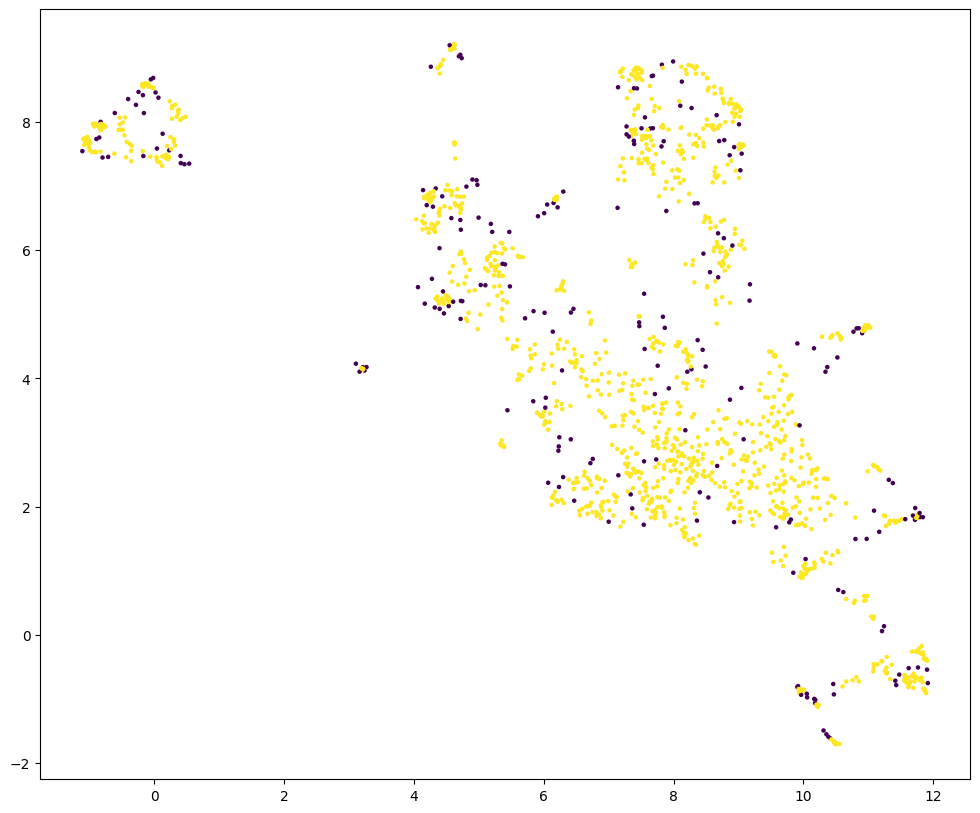

In [714]:
is_outlier = LocalOutlierFactor(contamination=0.15, n_neighbors=5).fit_predict(umap_embedding)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, c=is_outlier)
plt.show()

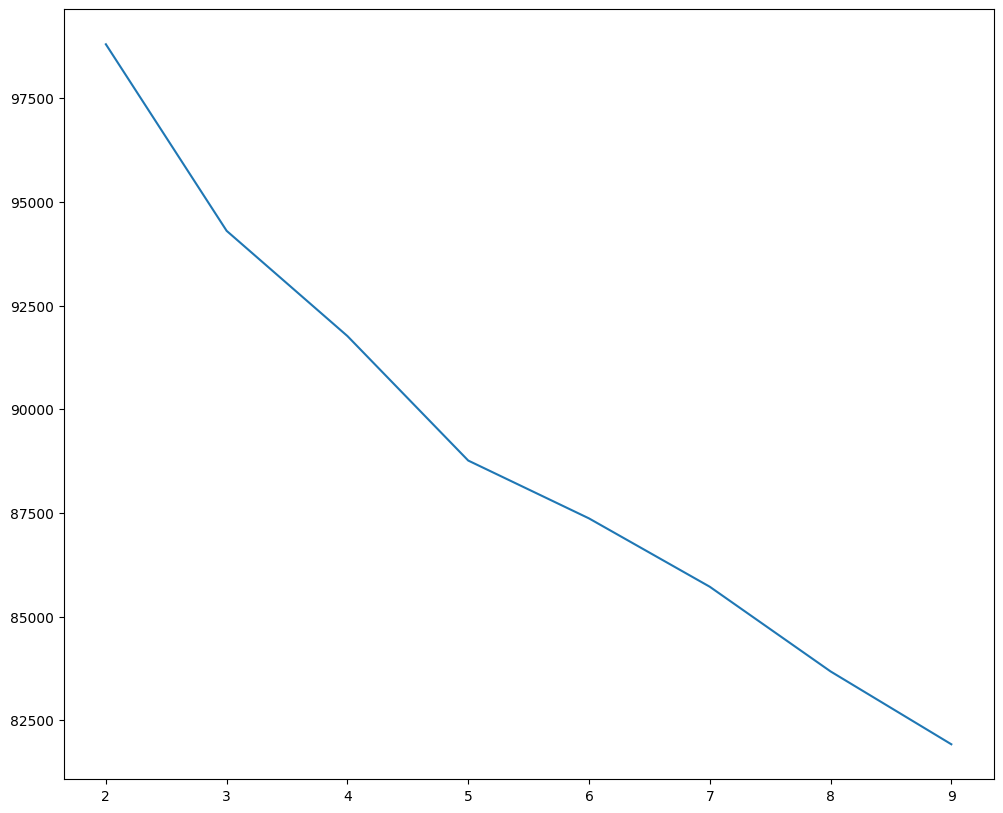

In [715]:
from sklearn.cluster import KMeans

elbow = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(ds_scaled[:, :-1])
  elbow.append(kmeans.inertia_)

plt.plot(range(2,10), elbow)

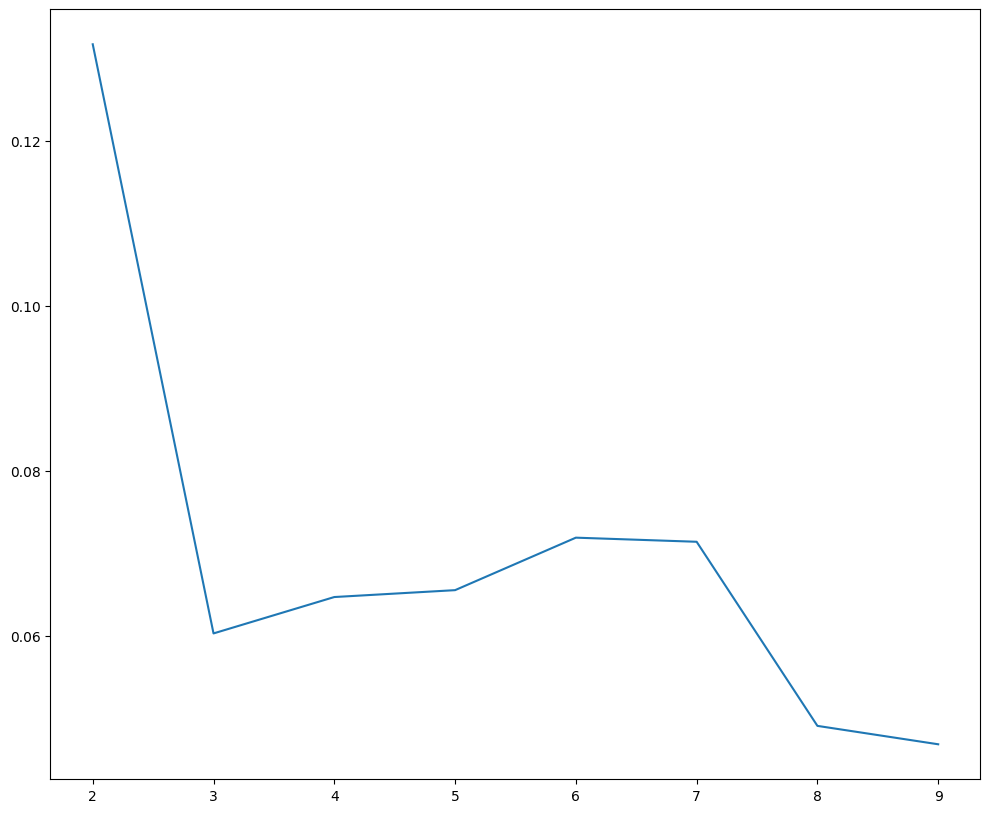

In [716]:
from sklearn.metrics import silhouette_score

elbow = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  elbow.append(silhouette_score(ds_scaled[:, :-1], kmeans.labels_))

plt.plot(range(2,10), elbow)

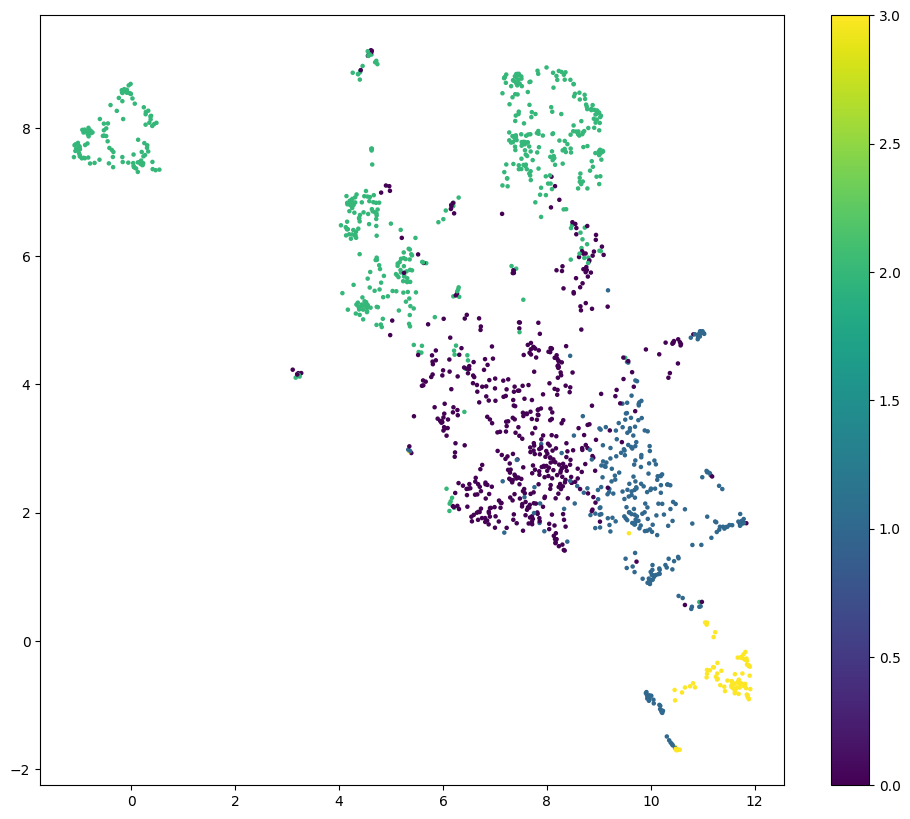

In [717]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(ds_scaled[:, :-1])
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, c=kmeans.labels_)
plt.colorbar()

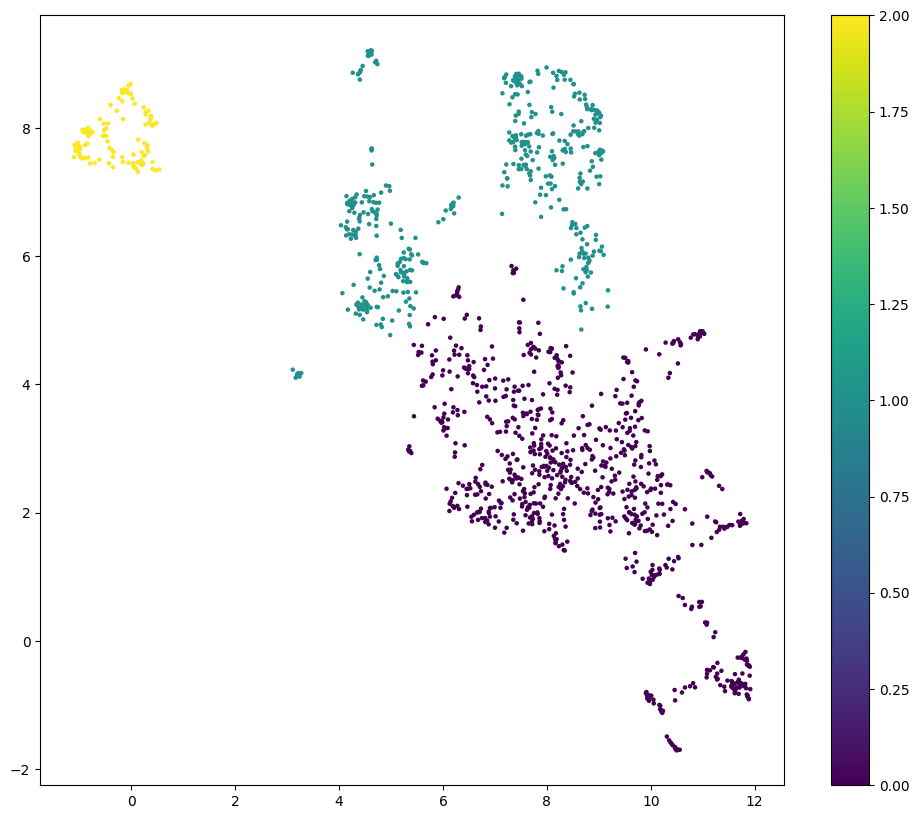

In [718]:
from sklearn.cluster import AgglomerativeClustering
hierar = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward').fit(umap_embedding)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, c=hierar.labels_)
plt.colorbar()

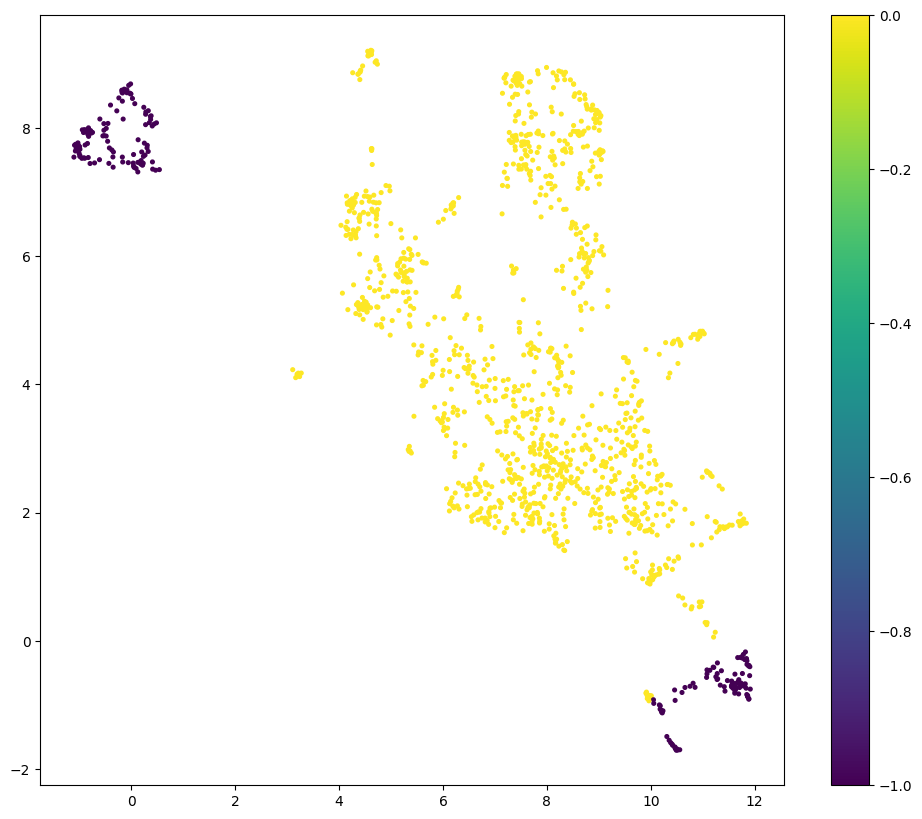

In [719]:
from sklearn.cluster import DBSCAN
dbsc_training = DBSCAN(eps = 4.5, min_samples = 1000).fit(umap_embedding)
plt.scatter(umap_embedding[:,0], umap_embedding[:,1], s=7, c=dbsc_training.labels_)
plt.colorbar()

In [720]:
print("Global Mean: ", ds.SalePrice.mean())

Global Mean:  180921.19589041095


In [721]:
ds.groupby(dbsc_training.labels_)['SalePrice'].mean()

,SalePrice
-1,199726.061611
0,177744.393114


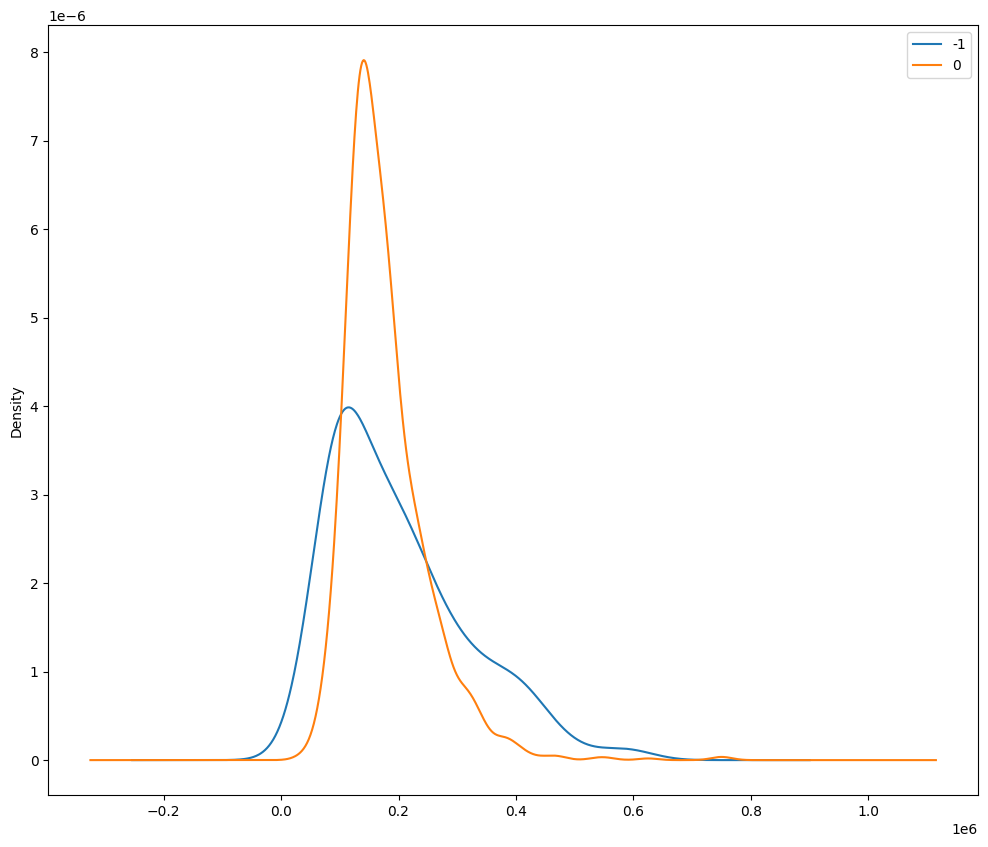

In [722]:
ds.groupby(dbsc_training.labels_)['SalePrice'].plot(kind='kde')
plt.legend()

In [723]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))
print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))

25465.92038777065
0.0897091892371182


In [724]:
fi = pd.DataFrame()
fi['features'] = ds.columns[:-1]
fi['importance'] = baseline_estimator.feature_importances_
fi.sort_values(by='importance', ascending=False)

,features,importance
16,OverallQual,0.466118
45,GrLivArea,0.140645
11,Neighborhood,0.122540
37,TotalBsmtSF,0.046595
42,1stFlrSF,0.033502
...,...,...
50,BedroomAbvGr,0.000000
51,KitchenAbvGr,0.000000
73,MiscVal,0.000000
70,PoolArea,0.000000


In [725]:
dbsc_training.labels_

array([0, 0, 0, ..., 0, 0, 0])

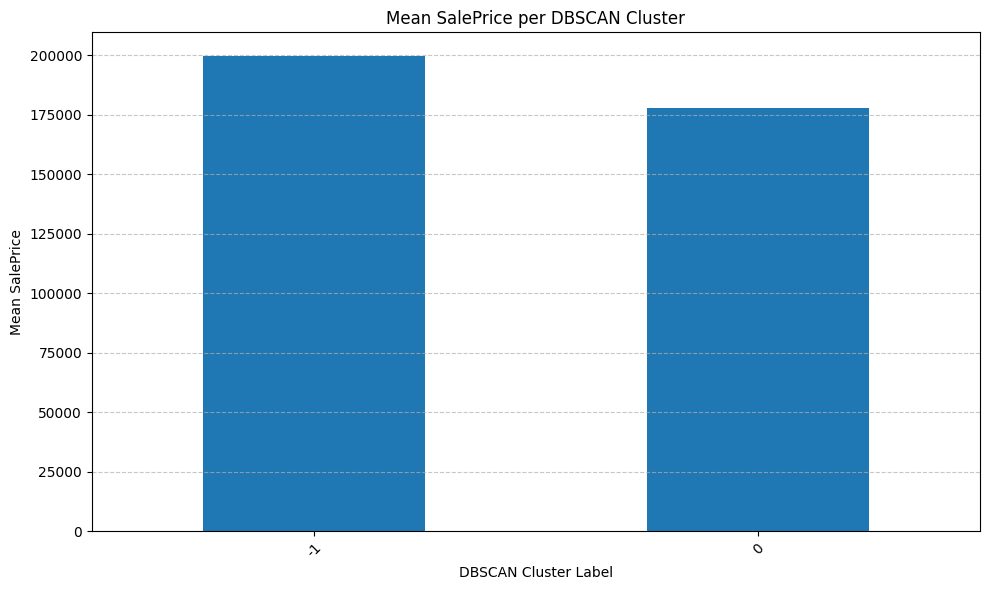

In [726]:
cluster_means = ds.groupby(dbsc_training.labels_)['SalePrice'].mean()
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar')
plt.title('Mean SalePrice per DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster Label')
plt.ylabel('Mean SalePrice')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'DBSCAN Cluster Label')

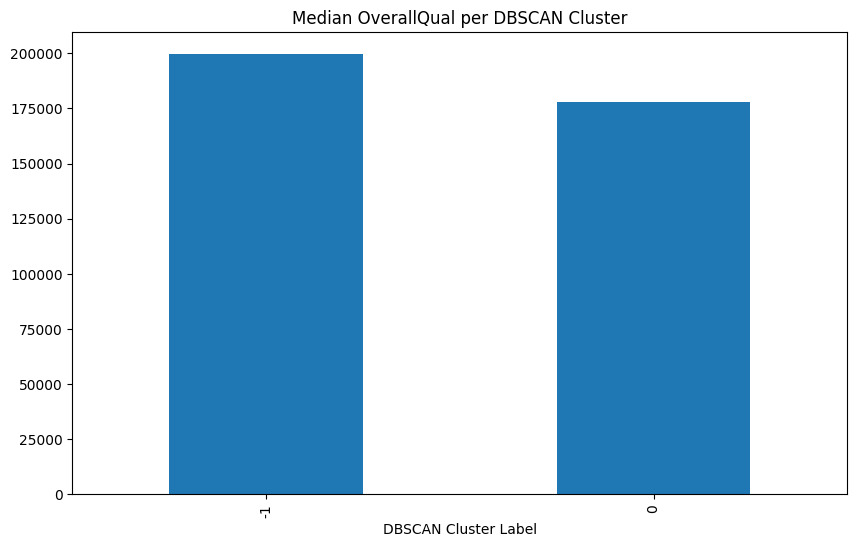

In [727]:
cluster_medians = ds.groupby(dbsc_training.labels_)['OverallQual'].median()
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar')
plt.title('Median OverallQual per DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster Label')

Text(0.5, 0, 'DBSCAN Cluster Label')

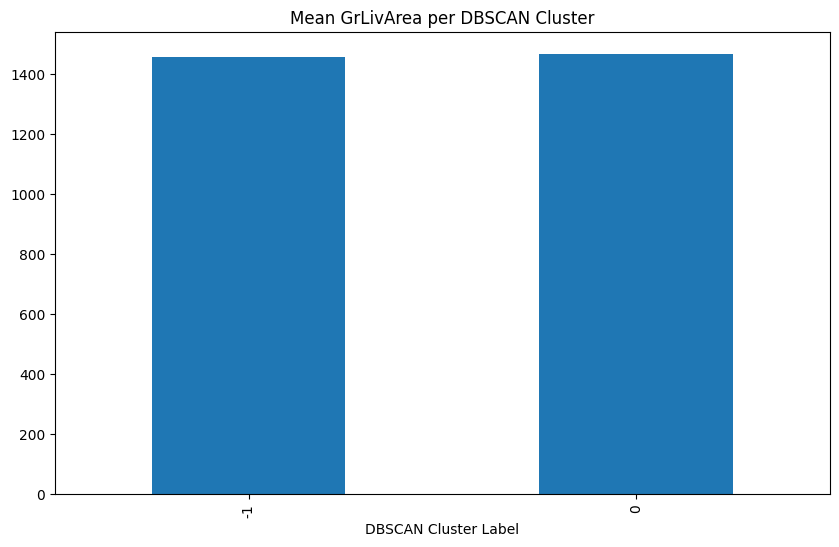

In [728]:
cluster_means = ds.groupby(dbsc_training.labels_)['GrLivArea'].median()
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar')
plt.title('Mean GrLivArea per DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster Label')

Text(0.5, 0, 'DBSCAN Cluster Label')

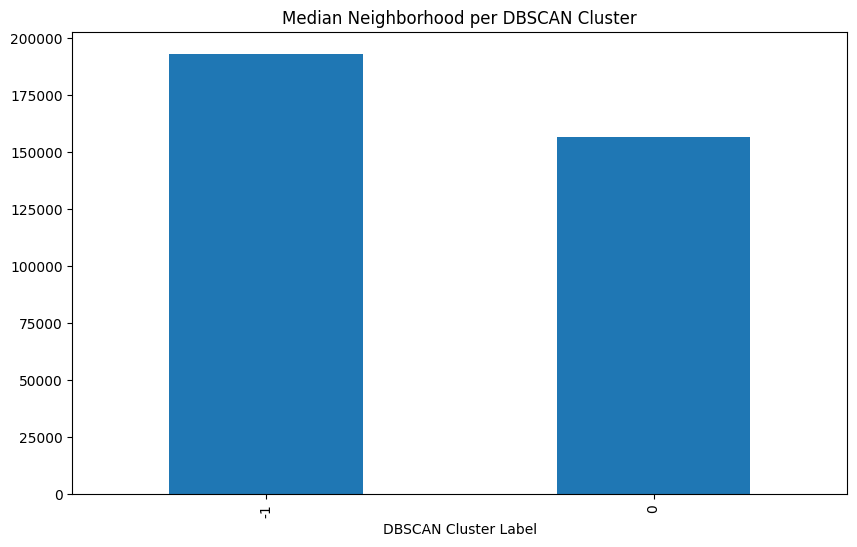

In [729]:
cluster_medians = ds.groupby(dbsc_training.labels_)['Neighborhood'].median()
plt.figure(figsize=(10, 6))
cluster_medians.plot(kind='bar')
plt.title('Median Neighborhood per DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster Label')

Text(0.5, 0, 'DBSCAN Cluster Label')

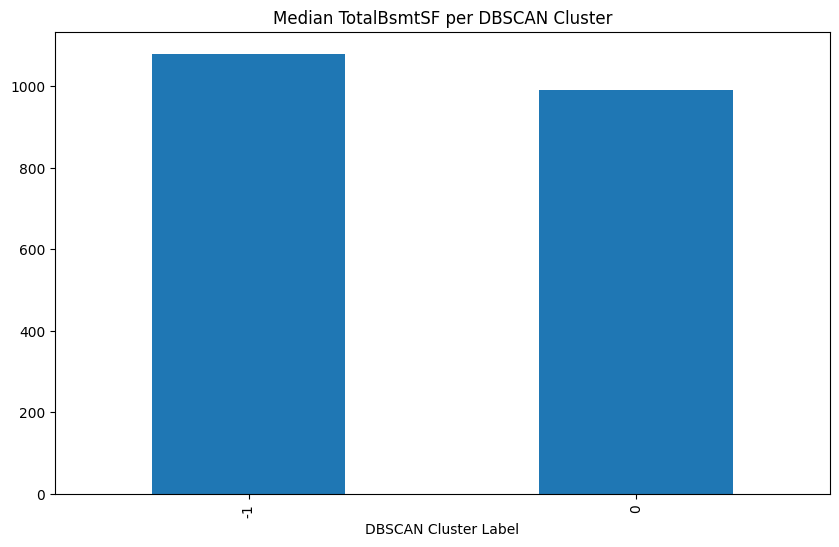

In [730]:

cluster_medians = ds.groupby(dbsc_training.labels_)['TotalBsmtSF'].median()
plt.figure(figsize=(10, 6))
cluster_medians.plot(kind='bar')
plt.title('Median TotalBsmtSF per DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster Label')

Text(0.5, 0, 'DBSCAN Cluster Label')

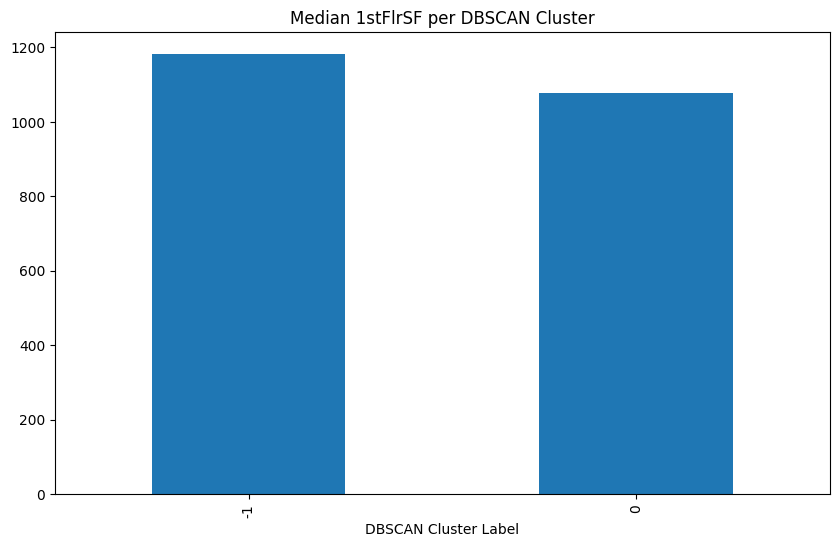

In [731]:
cluster_medians = ds.groupby(dbsc_training.labels_)['1stFlrSF'].median()
plt.figure(figsize=(10, 6))
cluster_medians.plot(kind='bar')
plt.title('Median 1stFlrSF per DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster Label')

In [732]:
c = dbsc_training.labels_!=-1
X = ds_scaled[:, :-1][c]
y = ds['SalePrice'].values[c]
c = dbsc_training.labels_[dbsc_training.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5,  mape(y_true, y_pred))

20789.866501917128 0.0836470741754723


In [733]:
outliers_X = ds_scaled[dbsc_training.labels_==-1][:, :-1]
outliers_y = ds[dbsc_training.labels_==-1]['SalePrice'].values
print(mse(outliers_y, baseline_estimator.predict(outliers_X))**0.5)
print(mape(outliers_y, baseline_estimator.predict(outliers_X)))

55849.39210015636
0.14752373648516054


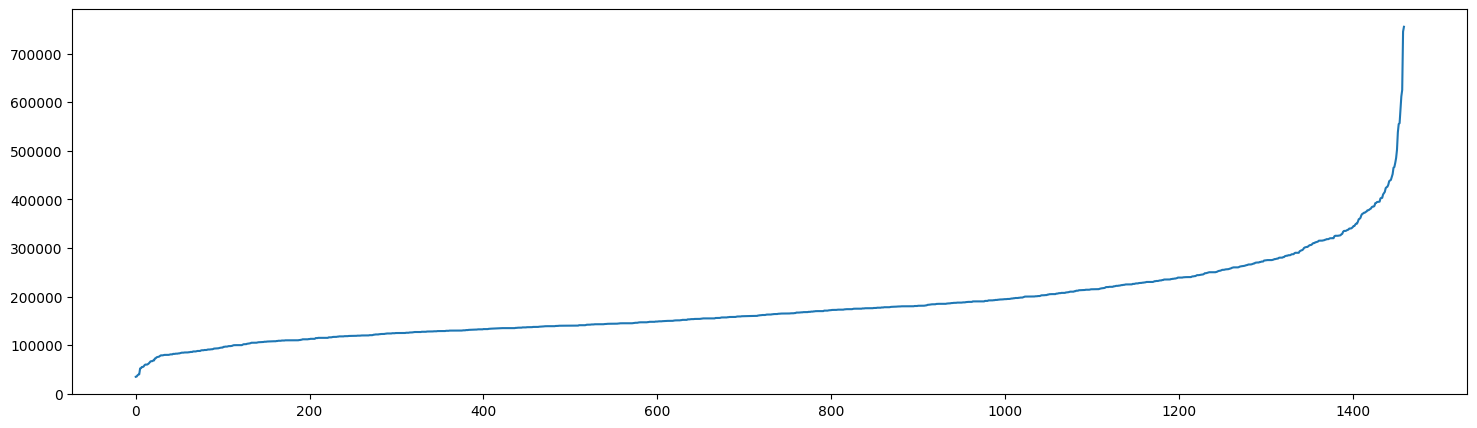

In [734]:
plt.figure (figsize=(18, 5))
plt.plot(sorted(ds.SalePrice))

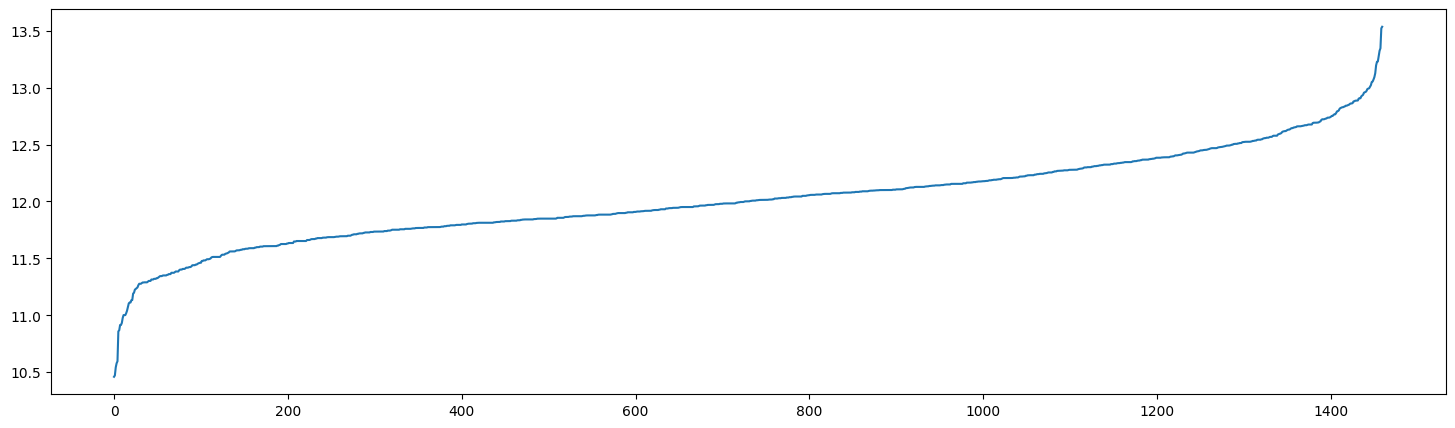

In [735]:
plt.figure (figsize=(18, 5))
plt.plot(sorted(np.log(ds.SalePrice)))

In [736]:
c = dbsc_training.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc_training.labels_[dbsc_training.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

20588.221564586245 0.08099388783741054


In [737]:
c = dbsc_training.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc_training.labels_[dbsc_training.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5,  mape(y_true, y_pred))

0.11251852603942925 0.006657907086107112


In [738]:
X_all = X
y_all = np.log(ds['SalePrice'].values)
labels_all = dbsc.labels_ # This will contain -1, 0, 1, 2, 3, 4

kf = KFold(n_splits=5)

mses = []
mapes = []
n_total_samples = 0

# Iterate over all unique labels, including -1 (outliers)
for cluster_id in np.unique(labels_all):
    y_true_cluster, y_pred_cluster = np.array([]), np.array([])
    # Split on the full data
    for train_index, test_index in kf.split(X_all):
        X_train, X_test = X_all[train_index], X_all[test_index]
        y_train, y_test = y_all[train_index], y_all[test_index]
        labels_train, labels_test = labels_all[train_index], labels_all[test_index]

        estimator = GradientBoostingRegressor(random_state=0)
        estimator.fit(X_train, y_train)

        # Filter test data for the current cluster *within the test fold*
        # This allows per-cluster evaluation even if the model is trained on all data
        current_cluster_mask = (labels_test == cluster_id)

        if np.sum(current_cluster_mask) > 0: # Only append if there are samples for this cluster in the test fold
            y_true_cluster = np.append(y_true_cluster, np.exp(y_test[current_cluster_mask]))
            y_pred_cluster = np.append(y_pred_cluster, np.exp(estimator.predict(X_test[current_cluster_mask])))

    if len(y_true_cluster) > 0: # Only calculate metrics if there were samples for this cluster across all folds
        mses.append(mse(y_true_cluster, y_pred_cluster)**0.5 * len(y_true_cluster))
        mapes.append(mape(y_true_cluster, y_pred_cluster) * len(y_true_cluster))
        n_total_samples += len(y_true_cluster)
        print(f"Cluster {cluster_id}, RMSE: {mse(y_true_cluster, y_pred_cluster)**0.5:.2f}, MAPE: {mape(y_true_cluster, y_pred_cluster):.4f}")
    else:
        print(f"Cluster {cluster_id}: No samples found in test folds for evaluation.")

if n_total_samples > 0:
    print(f"Overall Weighted RMSE: {sum(mses)/n_total_samples:.2f}")
    print(f"Overall Weighted MAPE: {sum(mapes)/n_total_samples:.4f}")
else:
    print("No samples were evaluated.")

Cluster -1, RMSE: 94001.17, MAPE: 0.2889
Cluster 0, RMSE: 80960.09, MAPE: 0.3388
Overall Weighted RMSE: 82766.42
Overall Weighted MAPE: 0.3319


In [739]:
# Add 'is_outlier' column to the training DataFrame (ds)
ds['is_outlier'] = (dbsc_training.labels_ == -1).astype(int)

print("New feature 'is_outlier' created in 'ds' DataFrame.")
print("Number of outliers (is_outlier=1):", ds['is_outlier'].sum())
print("Number of non-outliers (is_outlier=0):", len(ds) - ds['is_outlier'].sum())
print(ds['is_outlier'].head())

New feature 'is_outlier' created in 'ds' DataFrame.
Number of outliers (is_outlier=1): 211
Number of non-outliers (is_outlier=0): 1249
0    0
1    0
2    0
3    0
4    0
Name: is_outlier, dtype: int64


In [740]:
ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_outlier
0,239948.501672,191004.994787,-0.208034,8450,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,...,0,187596.837998,182046.410384,0,177882.000000,2008,173401.836622,175202.219533,208500,0
1,185224.811567,191004.994787,0.409895,9600,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,177934.574468,...,0,187596.837998,182046.410384,0,172307.269608,2007,173401.836622,175202.219533,181500,0
2,239948.501672,191004.994787,-0.084449,11250,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,176938.047529,...,0,187596.837998,182046.410384,0,195683.206349,2008,173401.836622,175202.219533,223500,0
3,166772.416667,191004.994787,-0.414011,9550,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,181623.425856,...,0,187596.837998,182046.410384,0,177882.000000,2006,173401.836622,146526.623762,140000,0
4,239948.501672,191004.994787,0.574676,14260,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,177934.574468,...,0,187596.837998,182046.410384,0,186518.966102,2008,173401.836622,175202.219533,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,239948.501672,191004.994787,-0.331620,7917,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,...,0,187596.837998,182046.410384,0,184651.827869,2007,173401.836622,175202.219533,175000,0
1456,185224.811567,191004.994787,0.615871,13175,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,...,0,148751.089172,182046.410384,0,177882.000000,2010,173401.836622,175202.219533,210000,0
1457,166772.416667,191004.994787,-0.166839,9042,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,...,0,178927.457627,151187.612245,2500,172307.269608,2010,173401.836622,175202.219533,266500,0
1458,185224.811567,191004.994787,-0.084449,9717,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,...,0,187596.837998,182046.410384,0,171503.262411,2010,173401.836622,175202.219533,142125,0


In [741]:
col=ds.columns[-2]
ds[col]=ds.pop(col)
ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,is_outlier,SalePrice
0,239948.501672,191004.994787,-0.208034,8450,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,...,0,187596.837998,182046.410384,0,177882.000000,2008,173401.836622,175202.219533,0,208500
1,185224.811567,191004.994787,0.409895,9600,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,177934.574468,...,0,187596.837998,182046.410384,0,172307.269608,2007,173401.836622,175202.219533,0,181500
2,239948.501672,191004.994787,-0.084449,11250,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,176938.047529,...,0,187596.837998,182046.410384,0,195683.206349,2008,173401.836622,175202.219533,0,223500
3,166772.416667,191004.994787,-0.414011,9550,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,181623.425856,...,0,187596.837998,182046.410384,0,177882.000000,2006,173401.836622,146526.623762,0,140000
4,239948.501672,191004.994787,0.574676,14260,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,177934.574468,...,0,187596.837998,182046.410384,0,186518.966102,2008,173401.836622,175202.219533,0,250000


In [742]:
scaler_f= StandardScaler()
ds_scaled = scaler_f.fit_transform(ds)

In [743]:
'''
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0
for cluster in range(5):
    y_true, y_pred = np.array([]), np.array([])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        c_train, c_test = c[train_index], c[test_index]
        estimator = GradientBoostingRegressor(random_state=0)
        estimator.fit(X_train, y_train)
        y_true = np.append(y_true, np.exp(y_test[c_test==cluster]))
        y_pred = np.append(y_pred, np.exp(estimator.predict(X_test[c_test==cluster])))
    mses.append(mse(y_true, y_pred)*len(y_true)**0.5)
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred)**0.5, 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)'''

SyntaxError: incomplete input (ipython-input-1801118476.py, line 1)

In [745]:
X_all = ds_scaled[:, :-1]
y_all = np.log(ds['SalePrice'].values)
labels_all = dbsc_training.labels_ # This will contain -1, 0, 1, 2, 3, 4

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

# Iterate over all unique labels, including -1 (outliers)
for cluster_id in np.unique(labels_all):
    y_true_cluster, y_pred_cluster = np.array([]), np.array([])
    # Split on the full data
    for train_index, test_index in kf.split(X_all):
        X_train, X_test = X_all[train_index], X_all[test_index]
        y_train, y_test = y_all[train_index], y_all[test_index]
        labels_train, labels_test = labels_all[train_index], labels_all[test_index]

        estimator = GradientBoostingRegressor(random_state=0)
        estimator.fit(X_train, y_train)

        # Filter test data for the current cluster *within the test fold*
        # This allows per-cluster evaluation even if the model is trained on all data
        current_cluster_mask = (labels_test == cluster_id)

        if np.sum(current_cluster_mask) > 0: # Only append if there are samples for this cluster in the test fold
            y_true_cluster = np.append(y_true_cluster, np.exp(y_test[current_cluster_mask]))
            y_pred_cluster = np.append(y_pred_cluster, np.exp(estimator.predict(X_test[current_cluster_mask])))

    if len(y_true_cluster) > 0: # Only calculate metrics if there were samples for this cluster across all folds
        mses.append(mse(y_true_cluster, y_pred_cluster)**0.5 * len(y_true_cluster))
        mapes.append(mape(y_true_cluster, y_pred_cluster) * len(y_true_cluster))
        n += len(y_true_cluster)
        print(f"Cluster {cluster_id}, RMSE: {mse(y_true_cluster, y_pred_cluster)**0.5:.2f}, MAPE: {mape(y_true_cluster, y_pred_cluster):.4f}")
    else:
        print(f"Cluster {cluster_id}: No samples found in test folds for evaluation.")

if n > 0:
    print(f"Overall Weighted RMSE: {sum(mses)/n:.2f}")
    print(f"Overall Weighted MAPE: {sum(mapes)/n:.4f}")
else:
    print("No samples were evaluated.")

Cluster -1, RMSE: 39365.10, MAPE: 0.1244
Cluster 0, RMSE: 22883.71, MAPE: 0.0815
Overall Weighted RMSE: 25265.61
Overall Weighted MAPE: 0.0877


In [746]:
mses = []
mapes = []
n = 0

dbsc_merged = pd.Series(dbsc_training.labels_).copy()
#dbsc_merged.loc[dbsc_merged == 0] = 2
#dbsc_merged.loc[dbsc_merged == 1] = 2

estimators = [GradientBoostingRegressor(n_estimators=50, learning_rate=0.6,max_depth=1, random_state=0)]
final_estimator = LinearRegression()

for cluster in np.unique(dbsc_merged):
    X = ds_scaled[dbsc_merged==cluster][:, :-1]
    y = np.log(ds['SalePrice'].values)[dbsc_merged==cluster]
    estimator = GradientBoostingRegressor(random_state=0)
    # estimator = stacking(estimators, final_estimator)
    kf = KFold(n_splits=5)

    y_true, y_pred = np.array([]), np.array([])
    _ = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        _.append(mse(np.exp(y_train), np.exp(estimator.predict(X_train))))
        y_true = np.append(y_true, np.exp(y_test))
        y_pred = np.append(y_pred, np.exp(estimator.predict(X_test)))
    print(sum(_)/len(_))
    mses.append(mse(y_true, y_pred)*len(y_true)**0.5)
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred)**0.5, 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

68499823.50697793
-1 mse : 41977.54031409295 mape: 0.13636798322913135
137963274.02341264
0 mse : 20574.87997619002 mape: 0.0811780060960492
27778779.448332913 0.0891540918324056


##Architecture

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/028/139/original/Architecture.png?1678872249'>

In [747]:
gaussians = {}
#for cluster in range(2, 5):
for cluster in np.unique(dbsc_merged):
    gaussians[cluster] = (
        umap_embedding[dbsc_merged==cluster].mean(axis=0),
        np.cov(umap_embedding[dbsc_merged==cluster].T)
    )

In [748]:
gaussians

{np.int64(-1): (array([4.8345804, 4.017224 ], dtype=float32),
  array([[ 33.36062149, -24.73041559],
         [-24.73041559,  18.78817292]])),
 np.int64(0): (array([7.7379107, 4.4259815], dtype=float32),
  array([[ 3.58960053, -1.85313075],
         [-1.85313075,  5.54759973]]))}

In [749]:
from scipy.stats import multivariate_normal as mvn

def gmm_inference(x):
    # TODO: Vectorize this
    # Using actual cluster labels -1 and 0 found by DBSCAN
    probs = np.array([mvn(*gaussians[-1]).pdf(x), mvn(*gaussians[0]).pdf(x)])
    probs = probs / np.sum(probs)
    return probs

In [750]:
gmm_inference(umap_embedding[0])

array([3.2209093e-15, 1.0000000e+00])

In [751]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50,random_state=42)),
    ('gbdt', GradientBoostingRegressor(n_estimators=50, learning_rate=0.6,max_depth=1, random_state=0)),
    ('knn', KNeighborsRegressor(n_neighbors=7))
]
final_estimator = LinearRegression()

In [752]:
#custom stacking
class stacking(BaseEstimator):
  def __init__(self, estimators, final_estimator):
      self.estimators = estimators
      self.final_estimator = final_estimator


  def fit(self, X, y=None):
        for estimator in self.estimators:
            estimator[1].fit(X, y)

        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        self.final_estimator.fit(pred_features, y)

  def predict(self, X):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.predict(pred_features)

  def score(self, X, y):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.score(pred_features, y)


In [ ]:
'''
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    # baseline_estimator = GradientBoostingRegressor(random_state=0)
    baeline_estimator = StackingRegressor(estimators, final_estimator)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

In [753]:
# Removed: c = dbsc.labels_!=-1 to include all data points
X = ds_scaled[:, :-1] # Use all scaled features
y = np.log(ds['SalePrice'].values) # Use all log-transformed SalePrice values
# Removed: c = dbsc.labels_[dbsc.labels_!=-1] as filtering is no longer applied here

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # c_train, c_test = c[train_index], c[test_index] # Not needed if not filtering by clusters
    # baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator = StackingRegressor(estimators, final_estimator) # Corrected typo baeline_estimator to baseline_estimator
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

28141.244777483604 0.09323620785065656


In [754]:
df=pd.read_csv("/content/house_prices_data/test.csv")
df_test=df.copy()

In [755]:
df.shape

(1459, 80)

In [756]:
print(df.isna().sum()[df.isna().sum()>0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [757]:
pd.DataFrame(df.isna().sum()[df.isna().sum()>0])

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [758]:
# Get all columns currently in the df missing values DataFrame
current_df_columns = pd.DataFrame(df.isna().sum()[df.isna().sum()>0]).index.tolist()
print(len(current_df_columns))
# Initialize lists to hold the categorized columns from the current_df_columns
df_continuous_features = []
df_categorical_features = []
df_cat_to_con_features = []

# Loop through each column in the current_df_columns
for col in current_df_columns:
    if col in continuous:
        df_continuous_features.append(col)
    elif col in categorical:
        df_categorical_features.append(col)
    elif col in cat_to_con:
        df_cat_to_con_features.append(col)

print(f"\nColumns in 'df' that are originally Continuous: {len(df_continuous_features)}")
print(df_continuous_features)

print(f"\nColumns in 'df' that are originally Categorical: {len(df_categorical_features)}")
print(df_categorical_features)

print(f"\nColumns in 'df' that are originally Categorical (from cat_to_con list): {len(df_cat_to_con_features)}")
print(df_cat_to_con_features)

# Check for any columns in df that were not in any of the original classification lists
all_original_lists_combined = set(continuous + categorical + cat_to_con)
df_columns_not_in_original_lists = [col for col in current_df_columns if col not in all_original_lists_combined]
if df_columns_not_in_original_lists:
    print(f"\nWARNING: The following columns in 'df' were not found in any of your original classification lists: {df_columns_not_in_original_lists}")

33

Columns in 'df' that are originally Continuous: 11
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

Columns in 'df' that are originally Categorical: 10
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'GarageType', 'Fence', 'MiscFeature', 'SaleType']

Columns in 'df' that are originally Categorical (from cat_to_con list): 11
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']



In [759]:
print("The PoolQC column was removed from our cat_to_con list, not by the classification cell but by our pre_processing function earlier")

The PoolQC column was removed from our cat_to_con list, not by the classification cell but by our pre_processing function earlier


In [760]:
df_cat_to_con_features

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [761]:
df_cat_to_con_features.append('PoolQC')

In [762]:
data_test=df.copy()
test_ids = df['Id']
categorical=df_categorical_features
cat_to_con=df_cat_to_con_features
todrop=['Id']

In [763]:
#fit and transform the continuous data using KNN pipeline
df[df_continuous_features] = pipe.fit_transform(df[df_continuous_features])
print(df[df_continuous_features] .isna().sum().sum())

0


In [764]:
def pre_processing(df, todrop, categorical, cat_to_con):
  #dropping
  df = df.drop(columns=todrop)

  #categorical
  logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
  for col in logical_nans:
      df[col] = df[col].fillna('NA')
  df['Electrical'] = df['Electrical'].fillna(df['Electrical'].value_counts().index[0])  # mode
  print("no. of nans in categorical cols:", df[categorical].isna().sum().sum())


  #cat_to_con
  df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
  logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
  for col in logical_nans:
      df[col] = df[col].fillna('NA')

  df.drop(columns = ['PoolQC'], inplace=True)
  cat_to_con.remove('PoolQC')
  print("no. of nans in cat_to_con cols:",ds[cat_to_con].isna().sum().sum())

  #target_encoding for test set

  '''
  for col in categorical:
      ds[col] = ds.groupby([col])[target].transform('mean')'''

  for col in categorical:
    df[col]=df[col].map(target_maps[col])
    df[col] = df[col].fillna(df[col].mean())
  print("no. of nans in categorical cols:", df[categorical].isna().sum().sum())

  #label encoding
  grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
  for col in grp1:
      df[col] = df[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})

  for col in ['BsmtFinType1', 'BsmtFinType2']:
      df[col] = df[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

  df['BsmtExposure'] = df[col].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
  df['Functional'] = df['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
  df['GarageFinish'] = df['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

  print("total nans in the dataframe:", df.isna().sum().sum())

  return df

In [765]:
df = pre_processing(df, todrop, categorical, cat_to_con)

no. of nans in categorical cols: 9
no. of nans in cat_to_con cols: 0
no. of nans in categorical cols: 0
total nans in the dataframe: 1462


In [766]:
print(df.isna().sum()[df.isna().sum()>0])

BsmtExposure    1459
KitchenQual        1
Functional         2
dtype: int64


In [767]:
df["KitchenQual"].value_counts()

,count
KitchenQual,
3.0,757
4.0,565
5.0,105
2.0,31


In [768]:
df["Functional"].value_counts()

,count
Functional,
7.0,1357
5.0,36
6.0,34
4.0,20
3.0,5
2.0,4
1.0,1


In [769]:
df["BsmtExposure"].value_counts()


,count
BsmtExposure,


In [770]:
df['Functional']=df['Functional'].fillna(0)
df['KitchenQual']=df['KitchenQual'].fillna(0)
df["BsmtExposure"]=df["BsmtExposure"].fillna(0)
print(df.isna().sum()[df.isna().sum()>0])

Series([], dtype: int64)


In [771]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Number of 'object' dtype columns in df: {len(object_cols)}")
print(f"Columns with 'object' dtype: {object_cols}")

Number of 'object' dtype columns in df: 18
Columns with 'object' dtype: ['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'PavedDrive', 'SaleCondition']


In [772]:
df[['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'PavedDrive', 'SaleCondition']]

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Foundation,Heating,CentralAir,Electrical,PavedDrive,SaleCondition
0,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,CBlock,GasA,Y,SBrkr,Y,Normal
1,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,CBlock,GasA,Y,SBrkr,Y,Normal
2,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,PConc,GasA,Y,SBrkr,Y,Normal
3,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,PConc,GasA,Y,SBrkr,Y,Normal
4,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,PConc,GasA,Y,SBrkr,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CBlock,GasA,Y,SBrkr,Y,Normal
1455,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CBlock,GasA,Y,SBrkr,Y,Abnorml
1456,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,CBlock,GasA,Y,SBrkr,Y,Abnorml
1457,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,PConc,GasA,Y,SBrkr,Y,Normal


In [773]:
for col in object_cols:
  df[col]=df[col].map(target_maps[col])

In [774]:
df[['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'PavedDrive', 'SaleCondition']]

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Foundation,Heating,CentralAir,Electrical,PavedDrive,SaleCondition
0,181130.538514,164754.818378,180183.746758,176938.047529,179956.799566,145847.080000,142475.481481,181169.405536,185763.807377,175985.477961,171483.956179,179803.679219,149805.714511,182021.195378,186186.70989,186810.637453,186433.973881,175202.219533
1,181130.538514,206101.665289,180183.746758,181623.425856,179956.799566,145847.080000,184495.492063,181169.405536,185763.807377,175985.477961,218876.933566,179803.679219,149805.714511,182021.195378,186186.70989,186810.637453,186433.973881,175202.219533
2,181130.538514,206101.665289,180183.746758,176938.047529,179956.799566,192854.506329,184495.492063,181169.405536,185763.807377,210051.764045,171483.956179,179803.679219,225230.442040,182021.195378,186186.70989,186810.637453,186433.973881,175202.219533
3,181130.538514,206101.665289,180183.746758,176938.047529,179956.799566,192854.506329,184495.492063,181169.405536,185763.807377,210051.764045,171483.956179,179803.679219,225230.442040,182021.195378,186186.70989,186810.637453,186433.973881,175202.219533
4,181130.538514,206101.665289,231533.940000,176938.047529,179956.799566,310499.000000,184495.492063,181169.405536,181959.342105,175985.477961,171483.956179,179803.679219,225230.442040,182021.195378,186186.70989,186810.637453,186433.973881,175202.219533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,181130.538514,164754.818378,180183.746758,176938.047529,179956.799566,98576.470588,184495.492063,181169.405536,135911.627907,210051.764045,171483.956179,179803.679219,149805.714511,182021.195378,186186.70989,186810.637453,186433.973881,175202.219533
1455,181130.538514,164754.818378,180183.746758,176938.047529,179956.799566,98576.470588,184495.492063,181169.405536,181959.342105,210051.764045,171483.956179,179803.679219,149805.714511,182021.195378,186186.70989,186810.637453,186433.973881,146526.623762
1456,181130.538514,164754.818378,180183.746758,176938.047529,179956.799566,156270.122449,184495.492063,181169.405536,185763.807377,175985.477961,171483.956179,179803.679219,149805.714511,182021.195378,186186.70989,186810.637453,186433.973881,146526.623762
1457,181130.538514,164754.818378,180183.746758,176938.047529,179956.799566,156270.122449,184495.492063,181169.405536,185763.807377,135074.486486,171483.956179,179803.679219,225230.442040,182021.195378,186186.70989,186810.637453,186433.973881,175202.219533


In [781]:
scaler= StandardScaler()
Test_scaled = scaler.fit_transform(df)


/tmp/ipython-input-539368263.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding_test[:, 0], umap_embedding_test[:, 1], s=5, cmap='Spectral')


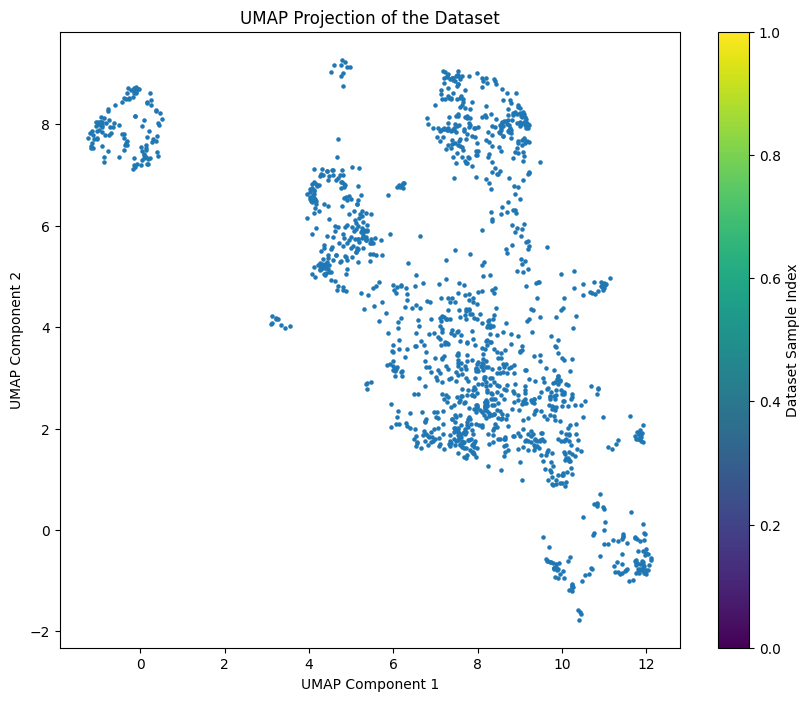

In [782]:
#umap_reducer = umap.UMAP(random_state=0)

umap_embedding_test = umap_reducer.transform(Test_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding_test[:, 0], umap_embedding_test[:, 1], s=5, cmap='Spectral')
plt.title('UMAP Projection of the Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Dataset Sample Index')
plt.show()

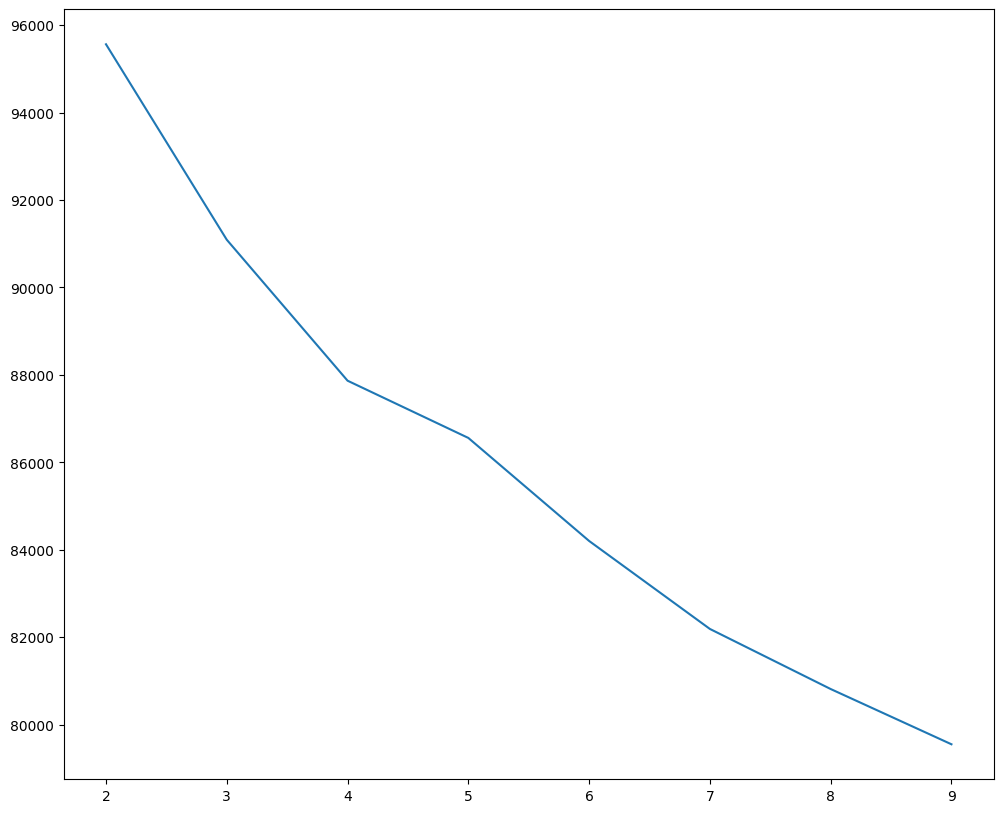

In [783]:
elbow = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(Test_scaled)
  elbow.append(kmeans.inertia_)

plt.plot(range(2,10), elbow)

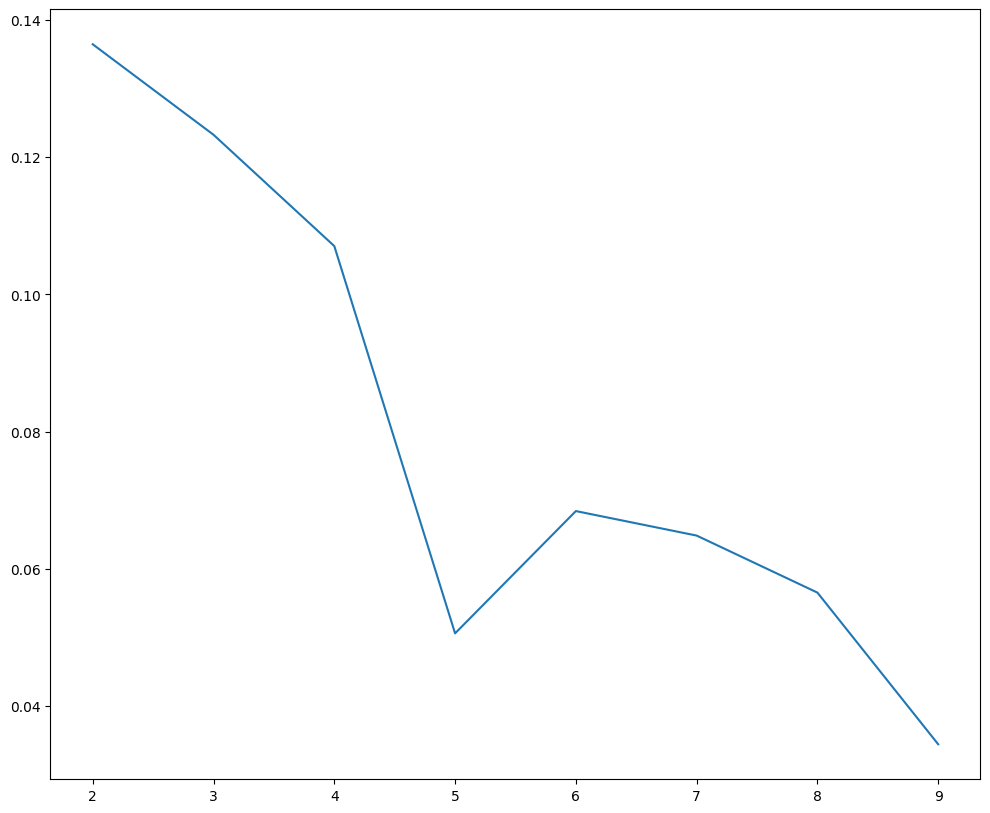

In [784]:
from sklearn.metrics import silhouette_score

elbow = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(Test_scaled)
  elbow.append(silhouette_score(Test_scaled, kmeans.labels_))

plt.plot(range(2,10), elbow)

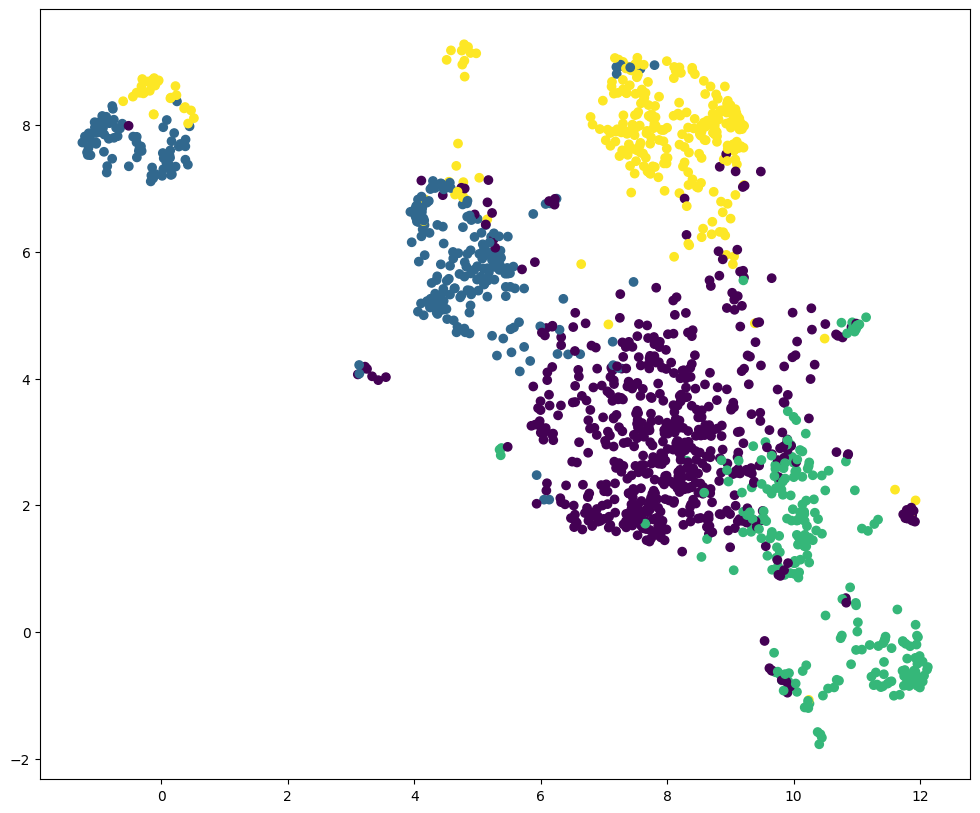

In [785]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(Test_scaled)
plt.scatter(umap_embedding_test[:,0], umap_embedding_test[:,1], c=kmeans.labels_)

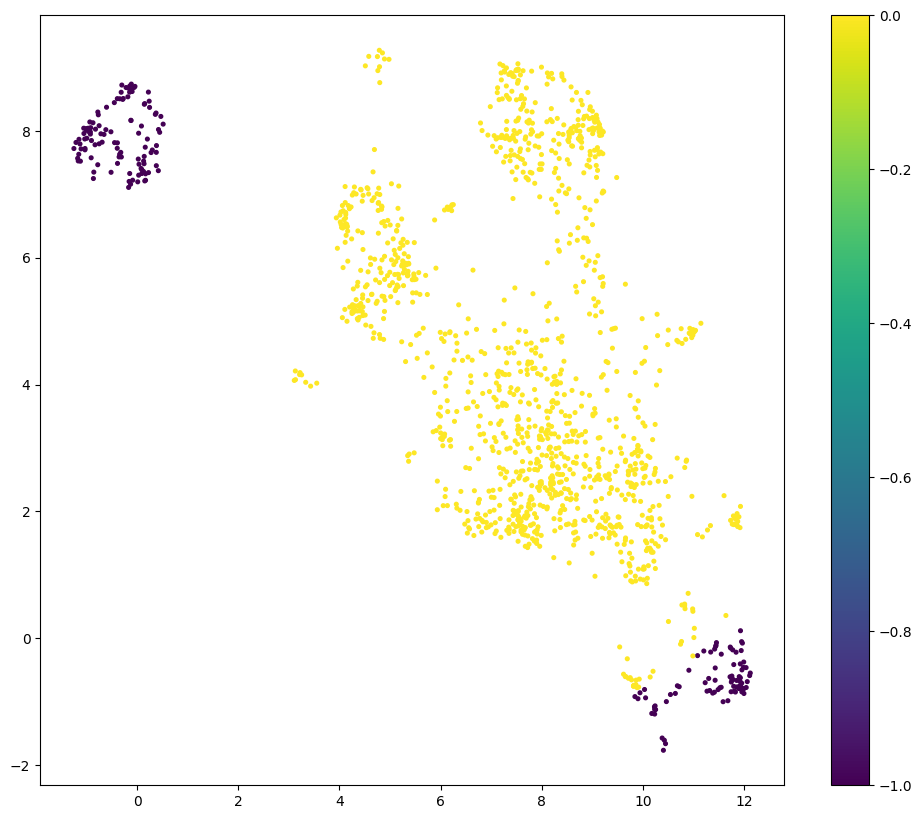

In [786]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 4.5, min_samples = 1000).fit(umap_embedding_test)
plt.scatter(umap_embedding_test[:,0], umap_embedding_test[:,1], s=7, c=dbsc.labels_)
plt.colorbar()

New feature 'is_outlier' created in 'df' DataFrame.
Number of outliers (is_outlier=1): 198
Number of non-outliers (is_outlier=0): 1261
0    0
1    0
2    0
3    0
4    0
Name: is_outlier, dtype: int64


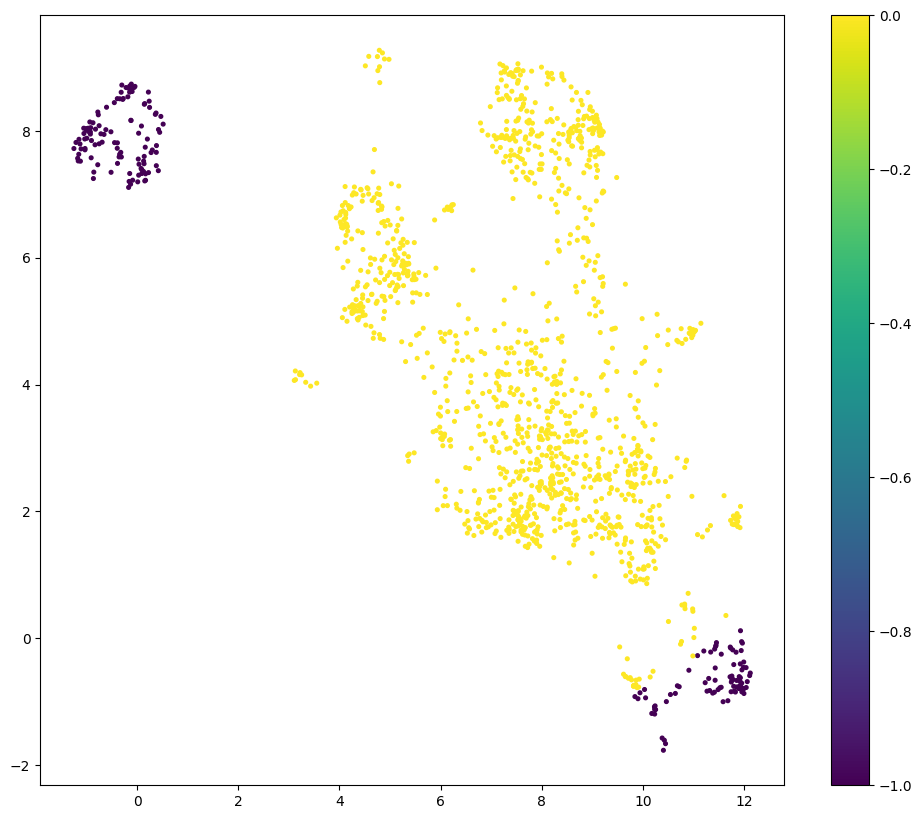

In [787]:
from sklearn.cluster import DBSCAN
dbsc_test = DBSCAN(eps = 4.5, min_samples = 1000).fit(umap_embedding_test)
plt.scatter(umap_embedding_test[:,0], umap_embedding_test[:,1], s=7, c=dbsc_test.labels_)
plt.colorbar()

df['is_outlier'] = (dbsc_test.labels_ == -1).astype(int)

print("New feature 'is_outlier' created in 'df' DataFrame.")
print("Number of outliers (is_outlier=1):", df['is_outlier'].sum())
print("Number of non-outliers (is_outlier=0):", len(df) - df['is_outlier'].sum())
print(df['is_outlier'].head())

In [789]:
# Use the scaler fitted on training features to transform the test data
# Ensure 'df' (test data) has the same feature columns as X_train_features before scaling
X_test_features = df.copy() # df should already be preprocessed and have 'is_outlier' and no 'SalePrice'
df_scaled = scaler.fit_transform(X_test_features)

In [790]:
predictions_log = baseline_estimator.predict(df_scaled)
predictions_actual = np.exp(predictions_log)

# Create a submission DataFrame
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions_actual})

# Display the first few rows of the submission file
print(submission.head())

# Optionally save the submission file
# submission.to_csv('submission.csv', index=False)

     Id      SalePrice
0  1461  128394.067554
1  1462  156549.235938
2  1463  194364.164912
3  1464  196441.393979
4  1465  198019.276371


In [791]:
 submission.to_csv('submission.csv', index=False)